# Early prediction of cart abandonement


This shared task is a simplified version of the Coveo Data Challenge organised at the eCommerce workshop co-located with the Special Interest Group for Information Retrieval (SIGIR) Conference in July 2021 in Montreal. Your goal will be to perform early prediction about whether a user will abandon their cart in the current shopping session after at least a product has been added to the cart. This is therefore a binary classification problem: a session can either feature in the abandon category or in the purchase category.

Your baseline model is a Naïve Bayes classifier of order 4, which thus predicts cart abandonement based on 4grams of symbolised clicks. No other piece of information should go into this model.

Early prediction will be evaluated at 5, 10, and 15 clicks after the first add-to-cart event in a session. You should ignore sessions where no product is added to the cart while training your system.

You will receive a training set (to be pre-processed) right away and use it to develop your pipeline - pre-process the data, derive a development set to test your model implementations and develop the code you need to complete the later parts of the assignment. You will also immediately receive a test set (already pre-processed), consisting of three .json files containing sessions trimmed after 5, 10, and 15 events post add to cart, with no information about which are purchase sessions and which aren't. Use these files to make sure your pipeline can make predictions using those as input. You need to return files with the predicted label for each session, as obtained by running the baseline model and your own model of choice. After the submission deadline, you will receive the true labels of the test sessions and you will have to send in a final file with the oracle prediction for the test sessions. The baseline model needs to be trained on the whole training corpus you receive, with no re-sampling and no separate models trained to predict for 5, 10, 15 events post add to cart. The experimental model can be trained following any strategy you observe to yield better results. The oracle needs to be estimated on the full test sets, one oracle for 5-event sessions, one for 10-event sessions, one for 15-event sessions.

You should carry out the following tasks:
1. pre-process the sessions in the training set (you can execute these tasks in the order you prefer as long as it makes logical sense, but make sure to specify which task is being solved in which block of code):
    1. sessionise <font color='red'>(1pt)</font>
    2. select sessions with at least one add-to-cart and discard all the others <font color='red'>(1pt)</font>
    3. add class labels: treat purchase as the positive class <font color='red'>(1pt)</font>
    4. cut purchase sessions to the last event before the first purchase <font color='red'>(1pt)</font>
    5. remove sessions shorter than 5 and longer than 155 clicks <font color='red'>(1pt)</font>
    6. symbolise actions (assign numerical values according to event frequency, there should be for symbols: view, detail, add, remove) <font color='red'>(1pt)</font>

2. implement the baseline model defined above (Naïve Bayes, order 4) and send in the predictions for the sessions in the test set (as three .json files, one for sessions with 5-events post add to cart, one for sessions with 10 events post add to cart, one for sessions with 15 events post add to cart, see formatting requirements below). I will compare the predictions with my own implementation and award points if the F1 score of your predictions and mine match for sessions of 5, 10, and 15 events (2 points for each matching F1).

3. implement another model of your choice (an SVM, a Markov Chain, a neural network, an anomaly detection algorithm if you feel more adventurous, or something else) and send in the predictions for the sessions in the test set, again as three separate .json files, one for each early prediction task (at 5, 10, 15 events post add to cart).

You are not allowed to submit another Naïve Bayes Classifier where you only changed the ngram size as an experimental model, but you can feed your model any information you can retrieve from the dataset, including dwell times, day-of-the-week, time of the day, and SKUs. Therefore, a NBC fed with more than just clicks is a valid experimental model. However, you are not allowed to use additional data sources other than the training set: your notebook has to run considering only the information provided in the file you downloaded from the WeTransfer link. One week prior to the deadline I will share the test sessions, already pre-processed. You should run your trained models on such sessions and return files with the predicted label for each session. I will compare your predictions to the real labels and compute an f1 score, separately for sessions of 5, 10, and 15 events <font color='red'>(10 pts attributed to the model with the best f1 at 15 clicks post add-to-cart. Then, the difference in f1 between the baseline and the best model will be partitioned in ten bins of equal size. Models falling in the top bin will get 9 pts, models falling in the second bin will get 8.5 pts and so on. Models falling in the lowest bin (closest to baseline) will get 4.5 pts while working models not outperforming the baseline will get 2 pts. Even if I only consider performance after 15 events, you need to also submit predictions for sessions of 5 and 10 events, or no points will be awarded. If you don't submit predictions, no points will be awarded, even if the submitted notebook contains (working) code.</font>
    
4. implement an oracle model to get the upper bound on performance and send in its predictions for the sessions in the test set, always as three separate .json files, one for each early prediction task (at 5, 10, 15 events post add to cart). I will compare the predictions with my own implementation and award points if the F1 score matches for sessions of 5, 10, and 15 events post add to cart (1 point for each matching F1).

At the end of these four tasks you will thus have submitted 13 different files:
* the python notebook (naming convention: 'AoCD_assignment_group[groupID].ipynb')
* the baseline predictions (naming convention: 'predictions_group[groupID]_baseline_at{5|10|15}.json')
* the experimental model predictions (naming convention: 'predictions_group[groupID]_expModel_at{5|10|15}.json')
* the oracle predictions (naming convention: 'predictions_group[groupID]_oracle_at{5|10|15}.json')

Each prediction file should contain a simple Python dictionary mapping session IDs (keys, as strings - those found in the test files I make available) to predictions (values, integers, either 0 or 1). Failing to adhere to this format will result in no points being awarded.

5. do error analysis on one of the models (can be the baseline or your own model, or a comparison between their predictions and effectiveness) (<font color='red'>5 pts: you can use any approach, you will get points based on the conclusions you draw from the error analysis, there isn't a right and wrong here, but sensible and not). This should feature in the notebook: use the dev set as your eval data: in real life you should do this on the test set, but since the test set complete with true labels will be released late to ensure a fair evaluation procedure, you should inspect your models' behavior using the dev set.</font>

Make sure to indicate clearly in the notebook which output matches a certain task, using the task ID. No points will be awarded if you fail to indicate which task a certain code-block or markdown cell is addressing.

You should submit a complete notebook. If dependencies are required to run your code, make sure to install them at the beginning of the notebook. The only input files should be the ones you receive from me. Make sure you comment the code explaining what happens (use doc-strings to define what functions do, inline comments for more detailed information inside functions, as well as markdown cells to highlight the flow). If you submit undocumented code, you will automatically get a 1/10.

You need 17 points out of 30 to pass, meaning that 17/30 translates to a 5.5/10. In principle you can pass if you submit predictions from a model which doesn't beat the baseline, but you have to do tasks 1, 2, and 4 perfectly. We have seen how to pre-process the data, build an oracle model and how to implement a Naive Bayes Classifier during the practicals, so you have a blueprint for the first three tasks. If you stop here, however, you won't pass the assignment, so you have to engage with the implementation of a new model or feed new info to the baseline architecture. If you want to get a grade higher than 8 or edge your chances to pass, you have to engage with the error analysis.

IMPORTANT: I will consider predictions from one experimental model per group. You might have to test more than one (so derive a dev set from the training data to test different models), but only submit the one you think works best!! You can submit multiple times, but I'll consider the last file you submit (the last baseline predictions, the last experimental model predictions, the last oracle predictions, the last notebook).

# Required packages

In [119]:
# Importing packages
import json
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Loading the training set

In [64]:
# Reading the training set
train = pd.read_csv("/content/gdrive/MyDrive/training_data.csv", header = 0, sep = ',')

# Exploratory Data Analysis (EDA)

In [65]:
# Showing the first 5 rows of the training set
train.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url
0,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885210881,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
1,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,61ef3869355b78e11011f39fc7ac8f8dfb209b3442a9d5...,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
2,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
3,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
4,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,NaN,NaN,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...


In [66]:
# Checking the shape of the training set
train.shape

(30451347, 6)

In [67]:
# Obtaining a summary about the training set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30451347 entries, 0 to 30451346
Data columns (total 6 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   session_id_hash            object
 1   event_type                 object
 2   product_action             object
 3   product_sku_hash           object
 4   server_timestamp_epoch_ms  int64 
 5   hashed_url                 object
dtypes: int64(1), object(5)
memory usage: 1.4+ GB


In [68]:
# Cheking for missing values in the training set
# Source: 
# https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe
pd.isnull(train).sum()

session_id_hash                     0
event_type                          0
product_action               21658411
product_sku_hash             21658411
server_timestamp_epoch_ms           0
hashed_url                          0
dtype: int64

# 1. Pre-processing

## 1.A - Sessionization

In [69]:
# Imputing missing values in the product_action column with "view"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna
# https://stackoverflow.com/questions/45826792/replacing-nans-in-a-dataframe-with-a-string-value
train["product_action"].fillna("view", inplace = True)

# Printing the first 5 rows of the training set with imputed values in the product_column
train.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url
0,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885210881,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
1,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,61ef3869355b78e11011f39fc7ac8f8dfb209b3442a9d5...,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
2,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,view,NaN,1550885213307,4ed279f4f0deab6dfc80f4f7bf49d527fd894fa478a9ce...
3,20c458b802f6ea9374783bfc528b19421be977a6769785...,event_product,detail,d5157f8bc52965390fa21ad5842a8502bc3eb8b0930f3f...,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...
4,20c458b802f6ea9374783bfc528b19421be977a6769785...,pageview,view,NaN,1550885215484,7e4527ac6a32deed4f4f06bb7c49b907b7ca371e59d57d...


In [70]:
# Sessionization
# Source:
# Notebook "data.ipynb" from Practical Session 1 retrieved from Canvas
train = train.groupby("session_id_hash")["product_action"].agg(list).reset_index()

# Printing the first 5 rows of the sessionized trainin set
train.head()

,session_id_hash,product_action
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[view, detail, add, view, view, view, view, vi..."
1,00000277639fc5c6f816654b78bf3654ece7fd53a7338f...,"[view, view, view, view, view, view]"
2,000009f36a40de1d557afc083dbb3fc03eef2473337bad...,"[view, view]"
3,00000e812c3076d18245710a31b348d3f23314b7d0dc90...,[view]
4,000010504025397b03290c7457e0e7ef7ae93529f21eae...,"[detail, view, detail, view, detail, view, vie..."


In [71]:
# Cheking the shape of the training set
train.shape

(4187127, 2)

## 1.C - Adding labels (where purchase is 1 and non-purchase is 0)

In [72]:
# Adding labels to sessions where purchase = 1 and no-purchase = 0
# Source:
# https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas
search_purchase = ["purchase"]
train["purchase"] = train["product_action"].apply(lambda x:1 if any(i in x for i in search_purchase) else 0)

# Printing the first 5 rows of the training set including the labels
train.head()

,session_id_hash,product_action,purchase
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[view, detail, add, view, view, view, view, vi...",0
1,00000277639fc5c6f816654b78bf3654ece7fd53a7338f...,"[view, view, view, view, view, view]",0
2,000009f36a40de1d557afc083dbb3fc03eef2473337bad...,"[view, view]",0
3,00000e812c3076d18245710a31b348d3f23314b7d0dc90...,[view],0
4,000010504025397b03290c7457e0e7ef7ae93529f21eae...,"[detail, view, detail, view, detail, view, vie...",0


Text(0.5, 1.0, 'Distribution of the class label \n (1 = purchase and 0 = non-purchase)')

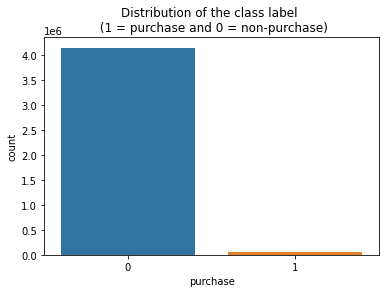

In [73]:
# Plotting a histogram to show the distribution of the labels (1 = purchase, 0 = no-purchase)
# Source:
# https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.histplot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
# https://stackoverflow.com/questions/8598163/split-title-of-a-figure-in-matplotlib-into-multiple-lines
ax = sns.countplot(data = train, x = "purchase")
ax.set_title('Distribution of the class label \n (1 = purchase and 0 = non-purchase)')

## 1.D - Cutting purchase sessions to the last event before the first purchase

In [74]:
# Cutting the purchase sessions to the last event before the first purchase
# Source:
# https://stackoverflow.com/questions/65320693/iterate-rows-of-a-column-and-remove-all-text-after-specific-words-in-python
# https://stackoverflow.com/questions/69515037/attributeerror-list-object-has-no-attribute-find
word = ["purchase"]

def cut(x):
    for i in word:
        if i in x:
            x=x[:x.index(i)]
    return x

train["session"] = train["product_action"].apply(lambda x: cut(x))

# Showing the first 5 rows of the training set
train.head()

,session_id_hash,product_action,purchase,session
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[view, detail, add, view, view, view, view, vi...",0,"[view, detail, add, view, view, view, view, vi..."
1,00000277639fc5c6f816654b78bf3654ece7fd53a7338f...,"[view, view, view, view, view, view]",0,"[view, view, view, view, view, view]"
2,000009f36a40de1d557afc083dbb3fc03eef2473337bad...,"[view, view]",0,"[view, view]"
3,00000e812c3076d18245710a31b348d3f23314b7d0dc90...,[view],0,[view]
4,000010504025397b03290c7457e0e7ef7ae93529f21eae...,"[detail, view, detail, view, detail, view, vie...",0,"[detail, view, detail, view, detail, view, vie..."


In [75]:
# Checking the shape of the training set
train.shape

(4187127, 4)

## 1.B - Selecting sessions with at least one add-to-cart

In [76]:
# Retaining only sessions with at least one add-to-cart
# Source: 
# https://stackoverflow.com/questions/53342715/pandas-dataframe-select-rows-where-a-list-column-contains-any-of-a-list-of-strin
event = ["add"]
select = train["session"].apply(lambda x: any(i for i in event if i in x))
train = train[select]

In [77]:
# Showing the shape of the training set
train.shape

(173967, 4)

In [78]:
# Showing the first 5 rows of the training set
train.head()

,session_id_hash,product_action,purchase,session
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[view, detail, add, view, view, view, view, vi...",0,"[view, detail, add, view, view, view, view, vi..."
4,000010504025397b03290c7457e0e7ef7ae93529f21eae...,"[detail, view, detail, view, detail, view, vie...",0,"[detail, view, detail, view, detail, view, vie..."
41,0000913afa22ba9c31efb992bcf6388b0bbfe28056bef3...,"[view, view, view, detail, view, view, detail,...",0,"[view, view, view, detail, view, view, detail,..."
71,00010d84aca1294479304044207fd268f63228844779c6...,"[view, view, view, detail, view, view, view, v...",0,"[view, view, view, detail, view, view, view, v..."
89,0001368d732951035a7ef7ef42b345a5c50b7d66966749...,"[view, detail, add, view, view, detail, add, v...",0,"[view, detail, add, view, view, detail, add, v..."


## 1.E - Removing sessions that are shorter than 5 and  longer than 155 clicks

In [79]:
# Removing sessions that are <5 and >155 clicks
# Source:
# https://stackoverflow.com/questions/64565254/removing-from-pandas-dataframe-all-rows-having-less-than-3-characters
train = train[train["session"].apply(len)>=5]
train = train[train["session"].apply(len)<=155]

# Selecting only the necessary features
# Source:
# https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy
train = train[["session_id_hash", "session", "purchase"]]

# Showing the first 5 rows of the training set
train.head()

,session_id_hash,session,purchase
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[view, detail, add, view, view, view, view, vi...",0
4,000010504025397b03290c7457e0e7ef7ae93529f21eae...,"[detail, view, detail, view, detail, view, vie...",0
41,0000913afa22ba9c31efb992bcf6388b0bbfe28056bef3...,"[view, view, view, detail, view, view, detail,...",0
71,00010d84aca1294479304044207fd268f63228844779c6...,"[view, view, view, detail, view, view, view, v...",0
89,0001368d732951035a7ef7ef42b345a5c50b7d66966749...,"[view, detail, add, view, view, detail, add, v...",0


In [80]:
# Checking the shape of the training set
train.shape

(161217, 3)

## 1.F - Symbolizing actions (assign numerical values according to event frequency for the symbols: view, detail, add, remove)

In [81]:
# Symbolizing the four actions
# Source: 
# Notebook "data.ipynb" from Practical Session 1 retrieved from Canvas

# Creating lists
sessions = train['session'].to_list()
labels = train['purchase'].to_list()

# Counting the frequency of actions
# # The more often an action occurs the smallest number is assigned, for ex: view = 1, because it is the most occured action
count = Counter([i for s in sessions for i in s])
symb_id = {symbol: x for x, symbol in enumerate(sorted(count, key=count.get, reverse=True), 1)}
print(symb_id)

# Symbolizing
symb_sessions = []
for x, session in enumerate(sessions):
    symb_session = [symb_id[y] for y in session]
    symb_sessions.append(symb_session)
print(symb_sessions[:10])

{'view': 1, 'detail': 2, 'add': 3, 'remove': 4}
[[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1], [2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3], [1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 4, 1], [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1], [1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 2, 3, 4, 1, 2, 1, 1, 1, 4, 4, 4, 1, 1, 4, 1

Text(0.5, 1.0, 'Distribution of the class label \n (1 = purchase and 0 = no-purchase)')

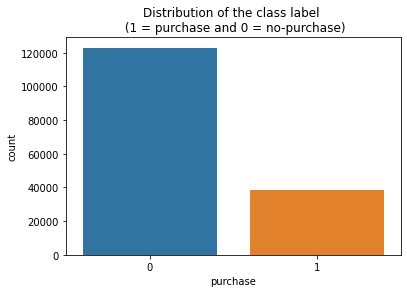

In [82]:
# Converting the sessions labels to a dataframe in order to plot the distribution
# Source:
# https://stackoverflow.com/questions/42049147/convert-list-to-pandas-dataframe-column
df_labels = pd.DataFrame({"purchase": labels})


# Plotting a histogram to show the distribution of the labels (1 = purchase, 0 = no-purchase)
# Source:
# https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.histplot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
# https://stackoverflow.com/questions/8598163/split-title-of-a-figure-in-matplotlib-into-multiple-lines
ax = sns.countplot(data = df_labels, x = "purchase")
ax.set_title('Distribution of the class label \n (1 = purchase and 0 = no-purchase)')

# 2. Baseline model (Naïve Bayes, order 4)

## Implementing the Naïve Bayes model

In [83]:
# Function to create ngrams and encode sessions
# Source:
# Notebook "models.ipynb" from Practical Session 3 retrieved from Canvas
def ngram_featurizer(session, n):    
    session = ['#']*(n-1) + session + ['+']*(n-1)
    ngrams = [tuple(session[i:i+n]) for i in range(len(session)-n+1)]
    
    return ngrams
    

def encode_sessions(sessions, n, mapping=None):    
    if not mapping:
        all_ngrams = set()
        for session in sessions:
            all_ngrams = all_ngrams.union(set(ngram_featurizer(session, n)))
    
        mapping = {ngram: i for i, ngram in enumerate(all_ngrams)}
    
    X = np.zeros((len(sessions), len(mapping)))
    for i, session in enumerate(sessions):
        for ngram in ngram_featurizer(session, n):
            try:
                X[i, mapping[ngram]] += 1
            except KeyError:
                pass
    
    return X, mapping

In [84]:
# Encoding the sessions in the training set (ngram size 4)
# Source:
# Notebook "models.ipynb" from Practical Session 3 retrieved from Canvas
Xtrain_NB, mapping = encode_sessions(symb_sessions, 4)
print(mapping, end=' ')

{(4, 1, 2, 4): 0, ('#', 3, 4, 1): 1, (2, 3, 1, 4): 2, (1, 4, 3, '+'): 3, (1, 2, 1, 1): 4, (2, 1, 1, 1): 5, ('#', 1, 3, 1): 6, (1, 4, 3, 1): 7, (3, 3, 4, '+'): 8, (4, 4, 3, 4): 9, (1, 3, 1, 4): 10, (1, 1, 2, 3): 11, ('#', 3, 4, 3): 12, ('#', 1, 2, 2): 13, (1, 2, 1, 3): 14, (2, 4, 4, '+'): 15, (3, 1, 1, 2): 16, ('#', 4, 2, 1): 17, (4, 3, 3, 1): 18, (1, 2, 2, '+'): 19, (2, 1, 1, 3): 20, (1, 4, 3, 3): 21, (3, 3, 3, 2): 22, (2, 4, 2, 1): 23, (3, 4, 1, '+'): 24, (2, 1, 2, '+'): 25, ('#', 4, 3, 2): 26, (3, 4, 3, 2): 27, (4, 2, 1, '+'): 28, ('#', 1, 2, 4): 29, (2, 1, 4, 2): 30, (2, 3, 4, 4): 31, (1, 2, 4, 1): 32, (3, 1, 1, 4): 33, (3, 1, 2, 2): 34, ('#', '#', 2, 1): 35, (4, 1, 2, '+'): 36, (4, 3, 3, 3): 37, (2, 2, 2, 1): 38, (3, 3, 3, 4): 39, ('#', '#', 3, 2): 40, (4, 1, 2, 1): 41, ('#', '#', '#', 2): 42, ('#', 4, 3, 4): 43, (3, 4, 4, 2): 44, (2, 3, 1, 1): 45, (3, 4, 3, 4): 46, (2, 1, 4, 4): 47, (4, 4, 3, '+'): 48, (1, 3, 1, '+'): 49, (1, 2, 4, 3): 50, (3, 1, 2, 4): 51, (4, 4, 1, 1): 52, (1, 3

In [85]:
# Defining the Naïve Bayes model
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
NB = MultinomialNB(alpha = 1, fit_prior = True)

# Training the Naïve Bayes model on the whole training set
NB = NB.fit(Xtrain_NB, labels)

In [86]:
# Reading the test sessions
sessions_test5 = json.load(open("/content/gdrive/MyDrive/test_sessions_5.json", "r"))
labels_test5 = json.load(open("/content/gdrive/MyDrive/test_labels_5.json", "r"))
sessions_test10 = json.load(open("/content/gdrive/MyDrive/test_sessions_10.json", "r"))
labels_test10 = json.load(open("/content/gdrive/MyDrive/test_labels_10.json", "r"))
sessions_test15 = json.load(open("/content/gdrive/MyDrive/test_sessions_15.json", "r"))
labels_test15 = json.load(open("/content/gdrive/MyDrive/test_labels_15.json", "r"))

## 2.A - 5 events post add-to-cart (F1 score)

In [154]:
# Splitting the values of the json files
# Source:
# https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/

# Creating a list for the test sessions 5
key_5 = []
value_5 = [] #contains the 5 events post add-to-cart
i = sessions_test5.items()
for i in i:
  key_5.append(i[0]), value_5.append(i[1])

In [88]:
# Splitting the values of the json files
# Source:
# https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/

# Creating a list for the test sessions 5
value_labels_5 = [] # contains the labels (0 and 1)
i = labels_test5.items()
for i in i:
  value_labels_5.append(i[1])

In [89]:
# Encoding the sessions in the test set 5 events post add-to-cart (ngram size 4)
# Source:
# Notebook "models.ipynb" from Practical Session 3 retrieved from Canvas
Xtest_NB_5, _ = encode_sessions(value_5, 4, mapping = mapping)
print(mapping, end=' ')

{(4, 1, 2, 4): 0, ('#', 3, 4, 1): 1, (2, 3, 1, 4): 2, (1, 4, 3, '+'): 3, (1, 2, 1, 1): 4, (2, 1, 1, 1): 5, ('#', 1, 3, 1): 6, (1, 4, 3, 1): 7, (3, 3, 4, '+'): 8, (4, 4, 3, 4): 9, (1, 3, 1, 4): 10, (1, 1, 2, 3): 11, ('#', 3, 4, 3): 12, ('#', 1, 2, 2): 13, (1, 2, 1, 3): 14, (2, 4, 4, '+'): 15, (3, 1, 1, 2): 16, ('#', 4, 2, 1): 17, (4, 3, 3, 1): 18, (1, 2, 2, '+'): 19, (2, 1, 1, 3): 20, (1, 4, 3, 3): 21, (3, 3, 3, 2): 22, (2, 4, 2, 1): 23, (3, 4, 1, '+'): 24, (2, 1, 2, '+'): 25, ('#', 4, 3, 2): 26, (3, 4, 3, 2): 27, (4, 2, 1, '+'): 28, ('#', 1, 2, 4): 29, (2, 1, 4, 2): 30, (2, 3, 4, 4): 31, (1, 2, 4, 1): 32, (3, 1, 1, 4): 33, (3, 1, 2, 2): 34, ('#', '#', 2, 1): 35, (4, 1, 2, '+'): 36, (4, 3, 3, 3): 37, (2, 2, 2, 1): 38, (3, 3, 3, 4): 39, ('#', '#', 3, 2): 40, (4, 1, 2, 1): 41, ('#', '#', '#', 2): 42, ('#', 4, 3, 4): 43, (3, 4, 4, 2): 44, (2, 3, 1, 1): 45, (3, 4, 3, 4): 46, (2, 1, 4, 4): 47, (4, 4, 3, '+'): 48, (1, 3, 1, '+'): 49, (1, 2, 4, 3): 50, (3, 1, 2, 4): 51, (4, 4, 1, 1): 52, (1, 3

In [90]:
# Predicting the 5 events post add-to-cart sessions with the baseline model (Naïve Bayes)
NB_predictions_5 = NB.predict(Xtest_NB_5)

In [96]:
# Saving the predictions for 5 events post add-to-cart as json file
with open('predictions_NB5.json', 'w') as f:
    json.dump(NB_predictions_5.tolist(), f)

In [165]:
# Converting the predictions in the right format
# Source:
# https://stackoverflow.com/questions/71733232/how-to-convert-array-into-dictionary-in-python
dict_NB5 = dict(enumerate(map(int, NB_predictions_5)))
print(dict_NB5)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 1, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 1, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 0, 41: 0, 42: 1, 43: 0, 44: 1, 45: 0, 46: 1, 47: 0, 48: 0, 49: 0, 50: 0, 51: 1, 52: 0, 53: 0, 54: 1, 55: 1, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 1, 64: 1, 65: 0, 66: 0, 67: 0, 68: 0, 69: 1, 70: 1, 71: 0, 72: 1, 73: 0, 74: 0, 75: 0, 76: 1, 77: 1, 78: 0, 79: 0, 80: 0, 81: 0, 82: 1, 83: 0, 84: 1, 85: 1, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 1, 94: 0, 95: 0, 96: 0, 97: 0, 98: 1, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 1, 109: 0, 110: 0, 111: 0, 112: 1, 113: 0, 114: 0, 115: 1, 116: 1, 117: 0, 118: 0, 119: 0, 120: 1, 121: 0, 122: 0, 123: 0, 124: 1, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 1, 135: 1, 136: 0, 137: 0, 138: 

In [179]:
# Saving the predictions for 5 events post add-to-cart as json file
with open('predictions_group10_baseline_at5.json', 'w') as f:
    json.dump(dict_NB5, f)

In [91]:
# Calculating the F1 score for the baseline model (Naïve Bayes)
# Source:
# # Computing the F1 score
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_nb5 = metrics.f1_score(value_labels_5, NB_predictions_5)
print("F1 score 5 events post add-to-cart with Naïve Bayes is:", f1_nb5)

F1 score 5 events post add-to-cart with Naïve Bayes is: 0.3353846153846154


## 2.B - 10 events post add-to-cart (F1 score)

In [152]:
# Splitting the values of the json files
# Source:
# https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/

# Creating a list for the test sessions 10
key_10 = []
value_10 = [] # contains the 10 events post add-to-cart
i = sessions_test10.items()
for i in i:
   key_10.append(i[0]), value_10.append(i[1])

In [93]:
# Splitting the values of the json files
# Source:
# https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/

# Creating a list for the test sessions 10
value_labels_10 = [] # contains the labels (0 and 1)
i = labels_test10.items()
for i in i:
  value_labels_10.append(i[1])

In [94]:
# Encoding the sessions in the test set 10 events post add-to-cart (ngram size 4)
# Source:
# Notebook "models.ipynb" from Practical Session 3 retrieved from Canvas
Xtest_NB_10, _ = encode_sessions(value_10, 4, mapping = mapping)
print(mapping, end=' ')

{(4, 1, 2, 4): 0, ('#', 3, 4, 1): 1, (2, 3, 1, 4): 2, (1, 4, 3, '+'): 3, (1, 2, 1, 1): 4, (2, 1, 1, 1): 5, ('#', 1, 3, 1): 6, (1, 4, 3, 1): 7, (3, 3, 4, '+'): 8, (4, 4, 3, 4): 9, (1, 3, 1, 4): 10, (1, 1, 2, 3): 11, ('#', 3, 4, 3): 12, ('#', 1, 2, 2): 13, (1, 2, 1, 3): 14, (2, 4, 4, '+'): 15, (3, 1, 1, 2): 16, ('#', 4, 2, 1): 17, (4, 3, 3, 1): 18, (1, 2, 2, '+'): 19, (2, 1, 1, 3): 20, (1, 4, 3, 3): 21, (3, 3, 3, 2): 22, (2, 4, 2, 1): 23, (3, 4, 1, '+'): 24, (2, 1, 2, '+'): 25, ('#', 4, 3, 2): 26, (3, 4, 3, 2): 27, (4, 2, 1, '+'): 28, ('#', 1, 2, 4): 29, (2, 1, 4, 2): 30, (2, 3, 4, 4): 31, (1, 2, 4, 1): 32, (3, 1, 1, 4): 33, (3, 1, 2, 2): 34, ('#', '#', 2, 1): 35, (4, 1, 2, '+'): 36, (4, 3, 3, 3): 37, (2, 2, 2, 1): 38, (3, 3, 3, 4): 39, ('#', '#', 3, 2): 40, (4, 1, 2, 1): 41, ('#', '#', '#', 2): 42, ('#', 4, 3, 4): 43, (3, 4, 4, 2): 44, (2, 3, 1, 1): 45, (3, 4, 3, 4): 46, (2, 1, 4, 4): 47, (4, 4, 3, '+'): 48, (1, 3, 1, '+'): 49, (1, 2, 4, 3): 50, (3, 1, 2, 4): 51, (4, 4, 1, 1): 52, (1, 3

In [95]:
# Predicting the 10 events post add-to-cart sessions with the baseline model (Naïve Bayes)
NB_predictions_10 = NB.predict(Xtest_NB_10)

In [97]:
# Saving the predictions for 10 events post add-to-cart as json file
with open('predictions_NB10.json', 'w') as f:
    json.dump(NB_predictions_10.tolist(), f)

In [167]:
# Converting the predictions in the right format
# Source:
# https://stackoverflow.com/questions/71733232/how-to-convert-array-into-dictionary-in-python
dict_NB10 = dict(enumerate(map(int, NB_predictions_10)))
print(dict_NB10)

{0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 1, 18: 0, 19: 0, 20: 0, 21: 1, 22: 0, 23: 1, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 1, 31: 0, 32: 1, 33: 1, 34: 0, 35: 0, 36: 1, 37: 0, 38: 1, 39: 1, 40: 0, 41: 0, 42: 0, 43: 1, 44: 0, 45: 0, 46: 0, 47: 1, 48: 0, 49: 0, 50: 1, 51: 0, 52: 0, 53: 0, 54: 0, 55: 1, 56: 0, 57: 1, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 1, 66: 0, 67: 0, 68: 1, 69: 0, 70: 1, 71: 0, 72: 0, 73: 0, 74: 1, 75: 0, 76: 0, 77: 0, 78: 1, 79: 0, 80: 0, 81: 0, 82: 0, 83: 1, 84: 0, 85: 0, 86: 0, 87: 0, 88: 1, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 1, 96: 0, 97: 1, 98: 1, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 1, 105: 1, 106: 1, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 1, 113: 0, 114: 1, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 1, 122: 1, 123: 1, 124: 0, 125: 0, 126: 1, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 1, 133: 0, 134: 0, 135: 0, 136: 0, 137: 1, 138: 

In [168]:
# Saving the predictions for 10 events post add-to-cart as json file
with open('predictions_group10_baseline_at10.json', 'w') as f:
    json.dump(dict_NB10, f)

In [33]:
# Calculating the F1 score for the baseline model (Naïve Bayes)
# Source:
# # Computing the F1 score
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_nb10 = metrics.f1_score(value_labels_10, NB_predictions_10)
print("F1 score 10 events post add-to-cart with Naïve Bayes is:", f1_nb10)

F1 score 10 events post add-to-cart with Naïve Bayes is: 0.3649862291941085


## 2.C - 15 events post add-to-cart (F1 score)

In [147]:
# Splitting the values of the json files
# Source:
# https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/

# Creating a list for the test sessions 15
key_15 = []
value_15 = [] # contains the 15 events post add-to-cart
i = sessions_test15.items()
for i in i:
  key_15.append(i[0]),value_15.append(i[1])

In [99]:
# Splitting the values of the json files
# Source:
# https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/

# Creating a list for the test sessions 15
value_labels_15 = [] # contains the labels (0 and 1)
i = labels_test15.items()
for i in i:
  value_labels_15.append(i[1])

In [100]:
# Encoding the sessions in the test set 15 events post add-to-cart (ngram size 4)
# Source:
# Notebook "models.ipynb" from Practical Session 3 retrieved from Canvas
Xtest_NB_15, _ = encode_sessions(value_15, 4, mapping = mapping)
print(mapping, end=' ')

{(4, 1, 2, 4): 0, ('#', 3, 4, 1): 1, (2, 3, 1, 4): 2, (1, 4, 3, '+'): 3, (1, 2, 1, 1): 4, (2, 1, 1, 1): 5, ('#', 1, 3, 1): 6, (1, 4, 3, 1): 7, (3, 3, 4, '+'): 8, (4, 4, 3, 4): 9, (1, 3, 1, 4): 10, (1, 1, 2, 3): 11, ('#', 3, 4, 3): 12, ('#', 1, 2, 2): 13, (1, 2, 1, 3): 14, (2, 4, 4, '+'): 15, (3, 1, 1, 2): 16, ('#', 4, 2, 1): 17, (4, 3, 3, 1): 18, (1, 2, 2, '+'): 19, (2, 1, 1, 3): 20, (1, 4, 3, 3): 21, (3, 3, 3, 2): 22, (2, 4, 2, 1): 23, (3, 4, 1, '+'): 24, (2, 1, 2, '+'): 25, ('#', 4, 3, 2): 26, (3, 4, 3, 2): 27, (4, 2, 1, '+'): 28, ('#', 1, 2, 4): 29, (2, 1, 4, 2): 30, (2, 3, 4, 4): 31, (1, 2, 4, 1): 32, (3, 1, 1, 4): 33, (3, 1, 2, 2): 34, ('#', '#', 2, 1): 35, (4, 1, 2, '+'): 36, (4, 3, 3, 3): 37, (2, 2, 2, 1): 38, (3, 3, 3, 4): 39, ('#', '#', 3, 2): 40, (4, 1, 2, 1): 41, ('#', '#', '#', 2): 42, ('#', 4, 3, 4): 43, (3, 4, 4, 2): 44, (2, 3, 1, 1): 45, (3, 4, 3, 4): 46, (2, 1, 4, 4): 47, (4, 4, 3, '+'): 48, (1, 3, 1, '+'): 49, (1, 2, 4, 3): 50, (3, 1, 2, 4): 51, (4, 4, 1, 1): 52, (1, 3

In [101]:
# Predicting the 15 events post add-to-cart sessions with the baseline model (Naïve Bayes)
NB_predictions_15 = NB.predict(Xtest_NB_15)

In [102]:
# Saving the predictions for 15 events post add-to-cart as json file
with open('predictions_NB15.json', 'w') as f:
    json.dump(NB_predictions_15.tolist(), f)

In [177]:
# Converting the predictions in the right format
# Source:
# https://stackoverflow.com/questions/71733232/how-to-convert-array-into-dictionary-in-python
dict_NB15 = dict(enumerate(map(int, NB_predictions_15)))
print(dict_NB15)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 1, 12: 0, 13: 0, 14: 0, 15: 1, 16: 0, 17: 0, 18: 0, 19: 0, 20: 1, 21: 0, 22: 0, 23: 1, 24: 0, 25: 1, 26: 1, 27: 0, 28: 1, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 1, 35: 0, 36: 0, 37: 1, 38: 0, 39: 0, 40: 0, 41: 1, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 1, 49: 0, 50: 0, 51: 0, 52: 0, 53: 1, 54: 1, 55: 0, 56: 0, 57: 0, 58: 0, 59: 1, 60: 0, 61: 1, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 1, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 1, 74: 1, 75: 1, 76: 0, 77: 0, 78: 1, 79: 0, 80: 0, 81: 0, 82: 1, 83: 0, 84: 0, 85: 1, 86: 0, 87: 1, 88: 1, 89: 0, 90: 1, 91: 0, 92: 1, 93: 0, 94: 0, 95: 0, 96: 1, 97: 1, 98: 0, 99: 0, 100: 0, 101: 0, 102: 1, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 1, 110: 1, 111: 0, 112: 1, 113: 0, 114: 1, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 1, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 1, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [180]:
# Saving the predictions for 15 events post add-to-cart as json file
with open('predictions_group10_baseline_at15.json', 'w') as f:
    json.dump(dict_NB15, f)

In [103]:
# Calculating the F1 score for the baseline model (Naïve Bayes)
# Source:
# # Computing the F1 score
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_nb15 = metrics.f1_score(value_labels_15, NB_predictions_15)
print("F1 score 15 events post add-to-cart with Naïve Bayes is:", f1_nb15)

F1 score 15 events post add-to-cart with Naïve Bayes is: 0.3654191861415264


# Creating 5, 10, 15  events post-add-to cart

In [40]:
# Converting the sessions list to a dataframe
# Source:
# https://stackoverflow.com/questions/42049147/convert-list-to-pandas-dataframe-column
sessions_df = pd.DataFrame({"session_symbolized": symb_sessions})

In [41]:
# Showing the first 5 rows of the dataframe containing the symbolized sessions
sessions_df.head()

,session_symbolized
0,"[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, ..."
1,"[2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, ..."
2,"[1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, ..."
3,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ..."
4,"[1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1]"


In [42]:
# Checking the shape of the dataframe
sessions_df.shape

(161217, 1)

In [43]:
# Adding the dataframe which contains the symbolized sessions as a column to the training set
# Source:
# https://stackoverflow.com/questions/42049147/convert-list-to-pandas-dataframe-column
train["session_symbolized"] = symb_sessions

# Showing the first 5 rows of the training set
train.head()

,session_id_hash,product_action,purchase,session,session_symbolized
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[view, detail, add, view, view, view, view, vi...",0,"[view, detail, add, view, view, view, view, vi...","[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, ..."
4,000010504025397b03290c7457e0e7ef7ae93529f21eae...,"[detail, view, detail, view, detail, view, vie...",0,"[detail, view, detail, view, detail, view, vie...","[2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, ..."
41,0000913afa22ba9c31efb992bcf6388b0bbfe28056bef3...,"[view, view, view, detail, view, view, detail,...",0,"[view, view, view, detail, view, view, detail,...","[1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, ..."
71,00010d84aca1294479304044207fd268f63228844779c6...,"[view, view, view, detail, view, view, view, v...",0,"[view, view, view, detail, view, view, view, v...","[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ..."
89,0001368d732951035a7ef7ef42b345a5c50b7d66966749...,"[view, detail, add, view, view, detail, add, v...",0,"[view, detail, add, view, view, detail, add, v...","[1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1]"


In [44]:
# https://www.w3schools.com/python/ref_list_index.asp
# https://docs.python.org/3/library/constants.html#None
# https://www.w3schools.com/python/python_try_except.asp
# https://numpy.org/doc/stable/user/basics.indexing.html

# Function to create 5, 10, 15 events post add-to-cart

def get_actions(row, n):
    try:
        idx = row.index(3) # After symbolizing the action "add" is equal to "3"
        if len(row) >= idx + n + 1:
            return row[:idx+n+1]
        else:
            return None
    except ValueError:
        return None

In [45]:
# Creating 5 events post add-to-cart sessions
train_5 = train.copy()
train_5["session_5"] = train_5["session_symbolized"].apply(lambda x: get_actions(x, 5))
train_5 = train_5.dropna(subset=["session_5"]) # drop the rows with None

# Extracting the necessary columns
train_5 = train_5[['session_id_hash', 'session_5', 'purchase']]

# Showing the first 5 rows of the dataframe containing 5 events post add-to-cart
train_5.head()

,session_id_hash,session_5,purchase
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[1, 2, 3, 1, 1, 1, 1, 1]",0
4,000010504025397b03290c7457e0e7ef7ae93529f21eae...,"[2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, ...",0
41,0000913afa22ba9c31efb992bcf6388b0bbfe28056bef3...,"[1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, ...",0
71,00010d84aca1294479304044207fd268f63228844779c6...,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...",0
89,0001368d732951035a7ef7ef42b345a5c50b7d66966749...,"[1, 2, 3, 1, 1, 2, 3, 1]",0


In [46]:
# Creating 10 events post add-to-cart sessions
train_10 = train.copy()
train_10["session_10"] = train_10["session_symbolized"].apply(lambda x: get_actions(x, 10))
train_10 = train_10.dropna(subset=["session_10"])

# Extracting the necessary columns
train_10 = train_10[['session_id_hash', 'session_10', 'purchase']]

# Showing the first 5 rows of the dataframe containing 10 events post add-to-cart
train_10.head()

,session_id_hash,session_10,purchase
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]",0
4,000010504025397b03290c7457e0e7ef7ae93529f21eae...,"[2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, ...",0
41,0000913afa22ba9c31efb992bcf6388b0bbfe28056bef3...,"[1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, ...",0
71,00010d84aca1294479304044207fd268f63228844779c6...,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...",0
89,0001368d732951035a7ef7ef42b345a5c50b7d66966749...,"[1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1]",0


In [47]:
# Creating 15 events post add-to-cart sessions
train_15 = train.copy()
train_15["session_15"] = train_15["session_symbolized"].apply(lambda x: get_actions(x, 15))
train_15 = train_15.dropna(subset=["session_15"])


# Extracting the necessary columns
train_15 = train_15[['session_id_hash', 'session_15', 'purchase']]

# Showing the first 5 rows of the dataframe containing 15 events post add-to-cart
train_15.head()

,session_id_hash,session_15,purchase
0,00000114e1075962f022114fcfc17f2d874e694ac5d201...,"[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, ...",0
4,000010504025397b03290c7457e0e7ef7ae93529f21eae...,"[2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, ...",0
41,0000913afa22ba9c31efb992bcf6388b0bbfe28056bef3...,"[1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, ...",0
71,00010d84aca1294479304044207fd268f63228844779c6...,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...",0
121,0001c180fb742f96ff388ba8f67a568e6fa66aed30d0d2...,"[1, 1, 1, 1, 2, 3, 4, 1, 2, 1, 1, 1, 4, 4, 4, ...",1


In [48]:
# Comparing the 5, 10, 15 events post add-to-cart
print("Session: before creating 5, 10, 15 events post add-to-cart:", train["session_symbolized"].iloc[0])
print("Session: 5 events post add-to-cart", train_5["session_5"].iloc[0])
print("Session: 10 events post add-to-cart", train_10["session_10"].iloc[0])
print("Session: 15 events post add-to-cart", train_15["session_15"].iloc[0])

Session: before creating 5, 10, 15 events post add-to-cart: [1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1]
Session: 5 events post add-to-cart [1, 2, 3, 1, 1, 1, 1, 1]
Session: 10 events post add-to-cart [1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]
Session: 15 events post add-to-cart [1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1]


In [49]:
print("Session length before creating 5, 10, 15 events post add-to-cart:", len(train["session_symbolized"].iloc[0]))
print("Session length 5 events post add-to-cart:", len(train_5["session_5"].iloc[0]))
print("Session length 10 events post add-to-cart:", len(train_10["session_10"].iloc[0]))
print("Session length 15 events post add-to-cart:", len(train_15["session_15"].iloc[0]))

Session length before creating 5, 10, 15 events post add-to-cart: 18
Session length 5 events post add-to-cart: 8
Session length 10 events post add-to-cart: 13
Session length 15 events post add-to-cart: 18


In [50]:
print("The shape of the dataframe containing 5 events post add-to-cart:", train_5.shape)
print("The shape of the dataframe containing 10 events post add-to-cart:", train_10.shape)
print("The shape of the dataframe containing 15 events post add-to-cart:", train_15.shape)

The shape of the dataframe containing 5 events post add-to-cart: (107686, 3)
The shape of the dataframe containing 10 events post add-to-cart: (75747, 3)
The shape of the dataframe containing 15 events post add-to-cart: (55176, 3)


In [51]:
# Converting the 5 events post add-to-cart sessions and labels to lists
train_5_sessions = train_5["session_5"].to_list()
train_5_labels = train_5["purchase"].to_list()

# Converting the 10 events post add-to-cart sessions and labels to lists
train_10_sessions = train_10["session_10"].to_list()
train_10_labels = train_10["purchase"].to_list()

# Converting the 15 events post add-to-cart sessions and labels to lists
train_15_sessions = train_15["session_15"].to_list()
train_15_labels = train_15["purchase"].to_list()

In [52]:
# Checking the length of the created lists for the 5, 10, 15 post add-to-cart sessions and labels
print("The length of the list containing the 5 post add-to-cart sessions is:",len(train_5_sessions))
print("The length of the list containing the 5 post add-to-cart labels is:", len(train_5_labels))

print("The length of the list containing the 10 post add-to-cart sessions is:",len(train_10_sessions))
print("The length of the list containing the 10 post add-to-cart labels is:", len(train_10_labels))

print("The length of the list containing the 15 post add-to-cart sessions is:",len(train_15_sessions))
print("The length of the list containing the 15 post add-to-cart labels is:", len(train_15_labels))

The length of the list containing the 5 post add-to-cart sessions is: 107686
The length of the list containing the 5 post add-to-cart labels is: 107686
The length of the list containing the 10 post add-to-cart sessions is: 75747
The length of the list containing the 10 post add-to-cart labels is: 75747
The length of the list containing the 15 post add-to-cart sessions is: 55176
The length of the list containing the 15 post add-to-cart labels is: 55176


# 3. Model of choice

# Pre-processing

In [ ]:
# Reading the training set
train_extra = pd.read_csv("/content/gdrive/MyDrive/training_data.csv")

## Sessionization

In [ ]:
# Imputing missing values in the product_action column with "view"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna
# https://stackoverflow.com/questions/45826792/replacing-nans-in-a-dataframe-with-a-string-value
train_extra["product_action"].fillna("view", inplace = True)

# Showing the first 5 rows of the training set with imputed values in the product_column
train_extra.head()

In [ ]:
# Sessionization
# Source:
# Notebook "data.ipynb" from Practical Session 1 retrieved from Canvas
grouping = train_extra.groupby("session_id_hash")["product_action"].agg(list)

# Adding the new created column to the training set
# Source:
# https://stackoverflow.com/questions/65093644/pandas-group-by-one-column-and-aggregate-other-column-to-list
# https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
train_extra["product_action"] = train_extra["session_id_hash"].map(grouping)

# Printing the first 5 rows of the training set with imputed values in the product_column
train_extra.head()

In [ ]:
# Dropping duplicates of "session_id_hash" and reset the index
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
train_extra = train_extra.drop_duplicates(subset = ["session_id_hash"]).reset_index(drop = True)

# Sorting the training set based on the "session_id_hash" column
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
train_extra = train_extra.sort_values(by = ["session_id_hash"])

# Reset the index
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
train_extra = train_extra.reset_index(drop = True)

In [ ]:
# Showing the first 5 rows of the training set after sessionization
train_extra.head()

In [ ]:
# Checking the shape of the training set
train_extra.shape

## Adding labels (where purchase is 1 and no-purchase is 0)

In [ ]:
# Adding labels to sessions where purchase = 1 and no-purchase = 0
# Source:
# https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas
search_purchase = ["purchase"]
train_extra["purchase"] = train_extra["product_action"].apply(lambda x:1 if any(i in x for i in search_purchase) else 0)

# Printing the first 5 rows of the training set including the labels
train_extra.head()

In [ ]:
# Checking the shape of the training set
train_extra.shape

## Cutting purchase sessions to the last event before the first purchase

In [ ]:
# Cutting the purchase sessions to the last event before the first purchase
# Source:
# https://stackoverflow.com/questions/65320693/iterate-rows-of-a-column-and-remove-all-text-after-specific-words-in-python
# https://stackoverflow.com/questions/69515037/attributeerror-list-object-has-no-attribute-find
word = ["purchase"]

def cut(x):
    for i in word:
        if i in x:
            x=x[:x.index(i)]
    return x

train_extra["session"] = train_extra["product_action"].apply(lambda x: cut(x))

# Showing the first 5 rows of the training set
train_extra.head()

In [ ]:
# Checking the shape of the training set
train_extra.shape

## Selecting sessions with at least one add-to-cart

In [ ]:
# Retaining only sessions with at least one add-to-cart
# Source: 
# https://stackoverflow.com/questions/53342715/pandas-dataframe-select-rows-where-a-list-column-contains-any-of-a-list-of-strin
event = ["add"]
select = train_extra["session"].apply(lambda x: any(i for i in event if i in x))
train_extra = train_extra[select]

# Showing the first 5 rows of the training set
train_extra.head()

In [ ]:
# Checking the shape of the training set
train_extra.shape

## Removing sessions that are shorter than 5 and  longer than 155 clicks

In [ ]:
# Removing sessions that are <5 and >155 clicks
# Source:
# https://stackoverflow.com/questions/64565254/removing-from-pandas-dataframe-all-rows-having-less-than-3-characters
train_extra = train_extra[train_extra["session"].apply(len)>=5]
train_extra = train_extra[train_extra["session"].apply(len)<=155]

# Showing the first 5 rows of the training set
train_extra.head()

In [ ]:
# Checking the shape of the training set
train_extra.shape

## Symbolizing actions (assign numerical values according to event frequency for the symbols: view, detail, add, remove)

In [ ]:
# Symbolizing the four actions
# Source: 
# Notebook "data.ipynb" from Practical Session 1 retrieved from Canvas

# Creating lists
sessions = train_extra['session'].to_list()
labels = train_extra['purchase'].to_list()

# Counting the frequency of actions
# The more often an action occurs the smallest number is assigned, for ex: view = 1, because it is the most occured action
count = Counter([i for s in sessions for i in s])
symb_id = {symbol: x for x, symbol in enumerate(sorted(count, key=count.get, reverse=True), 1)}
print(symb_id)

# Symbolizing
symb_sessions = []
for x, session in enumerate(sessions):
    symb_session = [symb_id[y] for y in session]
    symb_sessions.append(symb_session)
print(symb_sessions[:10])

In [ ]:
# Converting the sessions list to a dataframe
# Source:
# https://stackoverflow.com/questions/42049147/convert-list-to-pandas-dataframe-column
df_sessions = pd.DataFrame({"session_symbolized": symb_sessions})

# Showing the first 5 rows of the dataframe containing the symbolized sessions
df_sessions.head()

In [ ]:
# Checking the shape of the dataframe
df_sessions.shape

In [ ]:
# Adding the dataframe which contains the symbolized sessions as a column to the training set
# Source:
# https://stackoverflow.com/questions/42049147/convert-list-to-pandas-dataframe-column
train_extra["session_symbolized"] = symb_sessions

# Showing the first 5 rows of the training set
train_extra.head()

In [ ]:
# Checking the shape of the training set
train_extra.shape

## Creating new features

In [ ]:
# Creating a new feature "session_length"
# Source:
# https://stackoverflow.com/questions/30202011/how-can-i-count-comma-separated-values-in-one-column-of-my-panda-table/30202250
train_extra["session_length"] = train_extra["session_symbolized"].apply(len)

In [ ]:
# Showing the first 5 rows of the training set including the new feature "session_length"
train_extra.head()

In [ ]:
# Categorizing the event_product column (1 = event_product and 0 = pageview)
# Source:
# https://stackoverflow.com/questions/53342715/pandas-dataframe-select-rows-where-a-list-column-contains-any-of-a-list-of-strin
search_purchase = ["event_product"]
train_extra["event_product_cat"] = train_extra["event_type"].apply(lambda x:1 if any(i in x for i in search_purchase) else 0)

In [ ]:
# Showing the first 5 rows of the training set
train_extra.head()

In [ ]:
# Converting the "server_timestamp_epoch_ms" column to datetime
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
train_extra["date"] = pd.to_datetime(train_extra["server_timestamp_epoch_ms"], unit = "ms")

In [ ]:
# Showing the first 5 rows of the training set
train_extra.head()

In [ ]:
# Creating date related features

# Returning the day of the week
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html
train_extra["week_day"] = train_extra["date"].dt.weekday

# Creating a new feature "year"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
train_extra["year"] = train_extra["date"].dt.year

# Creating a new feature "month"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html
train_extra["month"] = train_extra["date"].dt.month

# Creating a new feature "day"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day.html
train_extra["day"] = train_extra["date"].dt.day

In [ ]:
# Showing the first 5 rows of the training set
train_extra.head()

In [ ]:
# Creating time related features

# Crating a new feature "hour"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html
train_extra["hour"] = train_extra["date"].dt.hour

# Crating a new feature "minute"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.minute.html
train_extra["minute"] = train_extra["date"].dt.minute

In [ ]:
# Showing the first 5 rows of the training set
train_extra.head()

In [ ]:
# Checking the shape after creating new features from the dataset
train_extra.shape

In [ ]:
# Function to create 5, 10, 15 events post add-to-cart
def get_actions(row, n):
    try:
        idx = row.index(3) # After symbolizing the aciton "add" is equal to "3"
        if len(row) >= idx + n + 1:
            return row[:idx+n+1]
        else:
            return None
    except ValueError:
        return None

In [ ]:
# Creating 5 events post add-to-cart sessions dataframe with extra features
train_extra_5 = train_extra.copy()
train_extra_5["session_5"] = train_extra_5["session_symbolized"].apply(lambda x: get_actions(x, 5))
train_extra_5 = train_extra_5.dropna(subset=["session_5"])

# Showing the first 5 rows of the dataframe containing 5 events post add-to-cart including extra features
train_extra_5.head()

In [ ]:
# Creating 10 events post add-to-cart sessions dataframe with extra features
train_extra_10 = train_extra.copy()
train_extra_10["session_10"] = train_extra_10["session_symbolized"].apply(lambda x: get_actions(x, 10))
train_extra_10 = train_extra_10.dropna(subset=["session_10"])

# Showing the first 5 rows of the dataframe containing 10 events post add-to-cart including extra features
train_extra_10.head()

In [ ]:
# Creating 15 events post add-to-cart sessions
train_extra_15 = train_extra.copy()
train_extra_15["session_15"] = train_extra_15["session_symbolized"].apply(lambda x: get_actions(x, 15))
train_extra_15 = train_extra_15.dropna(subset=["session_15"])

# Showing the first 5 rows of the dataframe containing 15 events post add-to-cart
train_extra_15.head()

In [ ]:
# Dropping the raw columns from the training set
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
train_extra.drop(["session_id_hash", "product_sku_hash", "product_action", "event_type", "server_timestamp_epoch_ms", "hashed_url", "session", "date"], axis = 1, inplace = True)

# Renaming the sessions_symbolized column
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
train_extra = train_extra.rename(columns = {"session_symbolized":"session"})

In [ ]:
# Dropping the raw columns from the training set including 5 events post add-to-cart
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
train_extra_5.drop(["session_id_hash", "product_sku_hash", "product_action", "event_type", "server_timestamp_epoch_ms", "hashed_url", "session", "date", "session_symbolized"], axis = 1, inplace = True)

# Renaming the 5 post add-to-cart sessions column
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
train_extra_5 = train_extra_5.rename(columns = {"session_5":"session"})

# Changing order of feature to create the same order as the training set 
# Source:
# https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe
move_col = train_extra_5.pop("session")
train_extra_5.insert(1, "session", move_col)

In [ ]:
# Dropping the raw columns from the training set including 10 events post add-to-cart
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
train_extra_10.drop(["session_id_hash", "product_sku_hash", "product_action", "event_type", "server_timestamp_epoch_ms", "hashed_url", "session", "date", "session_symbolized"], axis = 1, inplace = True)

# Renaming the 10 post add-to-cart sessions column
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
train_extra_10 = train_extra_10.rename(columns = {"session_10":"session"})

# Changing order of feature to create the same order as the training set 
# Source:
# https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe
move_col = train_extra_10.pop("session")
train_extra_10.insert(1, "session", move_col)

In [ ]:
# Dropping the raw columns from the training set including 15 events post add-to-cart
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
train_extra_15.drop(["session_id_hash", "product_sku_hash", "product_action", "event_type", "server_timestamp_epoch_ms", "hashed_url", "session", "date", "session_symbolized"], axis = 1, inplace = True)

# Renaming the 15 post add-to-cart sessions column
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
train_extra_15 = train_extra_15.rename(columns = {"session_15":"session"})

# Changing order of feature to create the same order as the training set 
# Source:
# https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe
move_col = train_extra_15.pop("session")
train_extra_15.insert(1, "session", move_col)

# Information about the training set without 5, 10, 15 events post add-to-cart

In [ ]:
# Obtaining a summary about the training set
train_extra.info()

In [ ]:
# Obataining descriptive statistics
train_extra.describe()

In [ ]:
# Showing the first 5 rows of the final training set
train_extra.head()

In [ ]:
# Checking the shape of the final training set
train_extra.shape

## Creating a validation set from the training set without 5, 10, 15 events post add-to-cart

In [ ]:
# Assigning the labels 
labels = train_extra["purchase"]

# Dropping the "labels" columns from the training set
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
train_extra.drop(["purchase"], axis = 1, inplace = True)

In [ ]:
# Splitting the training set into a training set and validation set
# Source:
# https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn
X_train, X_val, y_train, y_val = train_test_split(train_extra, labels, stratify = labels, test_size = 0.20, random_state = 1)

In [ ]:
# Showing the first 5 rows of the training set
X_train.head()

In [ ]:
# Showing the first 5 training labels
y_train[:5]

In [ ]:
# Showing the first 5 rows of the validation set
X_val.head()

In [ ]:
# Showing the first 5 validation labels
y_val[:5]

In [ ]:
# Checking the shape of created training set and validation set and the labels
print("The shape of the training set is:", X_train.shape)
print("The shape of the training labels is:", len(y_train))
print("The shape of the validation set is:", X_val.shape)
print("The shape of the validation labels is:", len(y_val))
print("The type of the features in the training set is:", X_train.dtypes)
print("The type of the features in the validation set is:", X_val.dtypes)

# Information about the training set 5 events post add-to-cart

In [ ]:
# Obtaining a summary about the training set 5 events post add-to-cart
train_extra_5.info()

In [ ]:
# Obataining descriptive statistics
train_extra_5.describe()

In [ ]:
# Showing the first 5 rows of the final training set
train_extra_5.head()

In [ ]:
# Checking the shape of the final training set 5 events post add-to-cart
train_extra_5.shape

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=3, p = 1)
# neigh.fit(Xtrain_NB, labels)

# # Predicting the 5 events post add-to-cart sessions with the baseline model (Naïve Bayes)
# knn_predictions_5 = neigh.predict(Xtest_NB_5)

# f1_knn5 = metrics.f1_score(value_labels_5, knn_predictions_5)
# print("F1 score 5 events post add-to-cart with knn is:", f1_knn5)

# Creating a validation set from the 5 events post add-to-cart training set

In [ ]:
# Assigning the labels 
labels_5 = train_extra_5["purchase"]

# Dropping the "labels" columns from the training set
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
train_extra_5.drop(["purchase"], axis = 1, inplace = True)

In [ ]:
# # Splitting the training set into a training set and validation set
# # Source:
# # https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn
# X_train_5, X_val_5, y_train_5, y_val_5 = train_test_split(train_extra_5, labels, stratify = labels, test_size = 0.20, random_state = 1)

In [ ]:
# # Showing the first 5 rows of the training set
# X_train_5.head()

In [ ]:
# # Showing the first 5 training labels
# y_train_5[:5]

In [ ]:
# # Showing the first 5 rows of the validation set
# X_val_5.head()

In [ ]:
# # Showing the first 5 validation labels
# y_val_5[:5]

In [ ]:
# # Checking the shape of created training set and validation set and the labels
# print("The shape of the training set (5 events post add-to-cart) is:", X_train_5.shape)
# print("The shape of the training labels (5 events post add-to-cart) is:", len(y_train_5))
# print("The shape of the validation set (5 events post add-to-cart) is:", X_val_5.shape)
# print("The shape of the validation labels (5 events post add-to-cart) is:", len(y_val_5))
# print("The type of the features in the training set (5 events post add-to-cart) is:", X_train_5.dtypes)
# print("The type of the features in the validation set (5 events post add-to-cart) is:", X_val_5.dtypes)

# Information about the training set 10 events post add-to-cart

In [ ]:
# Obtaining a summary about the training set
train_extra_10.info()

In [ ]:
# Obataining descriptive statistics
train_extra_10.describe()

In [ ]:
# Showing the first 5 rows of the final training set
train_extra_10.head()

In [ ]:
# Checking the shape of the final training set 10 events post add-to-cart
train_extra_10.shape

# Creating a validation set from the 10 events post add-to-cart training set

In [ ]:
# Assigning the labels 
labels = train_extra_10["purchase"]

# Dropping the "labels" columns from the training set
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
train_extra_10.drop(["purchase"], axis = 1, inplace = True)

In [ ]:
# # Splitting the training set into a training set and validation set
# # Source:
# # https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn
# X_train_10, X_val_10, y_train_10, y_val_10 = train_test_split(train_extra_10, labels, stratify = labels, test_size = 0.20, random_state = 1)

In [ ]:
# # Showing the first 5 rows of the training set
# X_train_10.head()

In [ ]:
# # Showing the first 5 training labels
# y_train_10[:5]

In [ ]:
# # Showing the first 5 rows of the validation set
# X_val_10.head()

In [ ]:
# # Showing the first 5 validation labels
# y_val_10[:5]

In [ ]:
# # Checking the shape of created training set and validation set and the labels
# print("The shape of the training set (10 events post add-to-cart) is:", X_train_10.shape)
# print("The shape of the training labels (10 events post add-to-cart) is:", len(y_train_10))
# print("The shape of the validation set (10 events post add-to-cart) is:", X_val_10.shape)
# print("The shape of the validation labels (10 events post add-to-cart) is:", len(y_val_10))
# print("The type of the features in the training set (10 events post add-to-cart) is:", X_train_10.dtypes)
# print("The type of the features in the validation set (10 events post add-to-cart) is:", X_val_10.dtypes)

# Information about the training set 15 events post add-to-cart

In [ ]:
# Obtaining a summary about the training set
train_extra_15.info()

In [ ]:
# Obataining descriptive statistics
train_extra_15.describe()

In [ ]:
# Showing the first 5 rows of the final training set
train_extra_15.head()

In [ ]:
# Checking the shape of the final training set 15 events post add-to-cart
train_extra_15.shape

# Creating a validation set from the 15 events post add-to-cart training set

In [ ]:
# Assigning the labels 
labels = train_extra_15["purchase"]

# Dropping the "labels" columns from the training set
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
train_extra_15.drop(["purchase"], axis = 1, inplace = True)

In [ ]:
# # Splitting the training set into a training set and validation set
# # Source:
# # https://stackoverflow.com/questions/29438265/stratified-train-test-split-in-scikit-learn
# X_train_15, X_val_15, y_train_15, y_val_15 = train_test_split(train_extra_15, labels, stratify = labels, test_size = 0.20, random_state = 1)

In [ ]:
# # Showing the first 5 rows of the training set
# X_train_15.head()

In [ ]:
# # Showing the first 5 training labels
# y_train_15[:5]

In [ ]:
# # Showing the first 5 rows of the validation set
# X_val_15.head()

In [ ]:
# # Showing the first 5 validation labels
# y_val_15[:5]

In [ ]:
# # Checking the shape of created training set and validation set and the labels
# print("The shape of the training set (15 events post add-to-cart) is:", X_train_15.shape)
# print("The shape of the training labels (15 events post add-to-cart) is:", len(y_train_15))
# print("The shape of the validation set (15 events post add-to-cart) is:", X_val_15.shape)
# print("The shape of the validation labels (15 events post add-to-cart) is:", len(y_val_15))
# print("The type of the features in the training set (15 events post add-to-cart) is:", X_train_15.dtypes)
# print("The type of the features in the validation set (15 events post add-to-cart) is:", X_val_15.dtypes)

# Loading the test set

In [ ]:
# Loading the test set
test = pd.read_csv("/content/gdrive/MyDrive/filtered_eval.csv", delim_whitespace = True)

# Exploratory Data Analysis (EDA)

In [ ]:
# Showing the first 5 rows of the test set
test.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url
0,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,pageview,view,1550925111200,de78f116f11d2bb196c9f1c877bc6aa2246552bb083e86...,NaN
1,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,event_product,detail,2ab1ba02f7ca5ec008fd4286405f1f1ef7ae86f144010c...,1550925111200,de78f116f11d2bb196c9f1c877bc6aa2246552bb083e86...
2,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,event_product,detail,a3c187b9a710a0aa3b91a249c5eefa6140a8e0f157e559...,1550925143386,ea0be0864c51acceee00cbcf49f5d3878b6cd7df660db7...
3,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,pageview,view,1550925143386,ea0be0864c51acceee00cbcf49f5d3878b6cd7df660db7...,NaN
4,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,pageview,view,1550925168367,de78f116f11d2bb196c9f1c877bc6aa2246552bb083e86...,NaN


In [ ]:
# Checking the shape of the test set
test.shape

(1039013, 6)

In [ ]:
# Obtaining a summary about the test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039013 entries, 0 to 1039012
Data columns (total 6 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   session_id_hash            1039013 non-null  object
 1   event_type                 1039013 non-null  object
 2   product_action             1039013 non-null  object
 3   product_sku_hash           1039013 non-null  object
 4   server_timestamp_epoch_ms  1039013 non-null  object
 5   hashed_url                 342584 non-null   object
dtypes: object(6)
memory usage: 47.6+ MB


In [ ]:
# Cheking for missing values in the test set
# Source: 
# https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe
pd.isnull(test).sum()

session_id_hash                   0
event_type                        0
product_action                    0
product_sku_hash                  0
server_timestamp_epoch_ms         0
hashed_url                   696429
dtype: int64

 # Pre-processing the test set

In [ ]:
# Sessionization
# Source:
# Notebook "data.ipynb" from Practical Session 1 retrieved from Canvas
grouping = test.groupby("session_id_hash")["product_action"].agg(list)

# Adding the new created column to the test set
# Source:
# https://stackoverflow.com/questions/65093644/pandas-group-by-one-column-and-aggregate-other-column-to-list
# https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
test["product_action"] = test["session_id_hash"].map(grouping)

# Printing the first 5 rows of the test set with imputed values in the product_column
test.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url
0,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,pageview,"[view, detail, detail, view, view, detail, vie...",1550925111200,de78f116f11d2bb196c9f1c877bc6aa2246552bb083e86...,NaN
1,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,event_product,"[view, detail, detail, view, view, detail, vie...",2ab1ba02f7ca5ec008fd4286405f1f1ef7ae86f144010c...,1550925111200,de78f116f11d2bb196c9f1c877bc6aa2246552bb083e86...
2,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,event_product,"[view, detail, detail, view, view, detail, vie...",a3c187b9a710a0aa3b91a249c5eefa6140a8e0f157e559...,1550925143386,ea0be0864c51acceee00cbcf49f5d3878b6cd7df660db7...
3,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,pageview,"[view, detail, detail, view, view, detail, vie...",1550925143386,ea0be0864c51acceee00cbcf49f5d3878b6cd7df660db7...,NaN
4,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,pageview,"[view, detail, detail, view, view, detail, vie...",1550925168367,de78f116f11d2bb196c9f1c877bc6aa2246552bb083e86...,NaN


In [ ]:
# Dropping duplicates of "session_id_hash" and reset the index
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
test = test.drop_duplicates(subset = ["session_id_hash"]).reset_index(drop = True)

# Sorting the test set based on the "session_id_hash" column
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
test = test.sort_values(by = ["session_id_hash"])

# Reset the index
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
test = test.reset_index(drop = True)

In [ ]:
# Showing the first 5 rows of the test set after sessionization
test.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url
0,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,pageview,"[view, detail, detail, view, view, detail, vie...",1550925111200,de78f116f11d2bb196c9f1c877bc6aa2246552bb083e86...,NaN
1,0006bbad7d1d1fb577307172adfb65bda305a6998050e7...,pageview,"[view, view, view, view, view, view, view, vie...",1551737744524,e657d62e524065ab39ddd9dba88d1bb17425adf88df8ae...,NaN
2,0007007d260df47d7c9cc306bdc2b4b6b8780d7ecc1c4d...,event_product,"[detail, view, detail, view, add, view, remove...",ac162afe05d911e0c488047ef922e4315723aae7e40099...,1552527947856,845b779d7a25a50a5e68ccfbe352124ea7ae723eb2dad5...
3,000718b63f09e50c0e00f32038b2b5439b16082f4ebe0a...,event_product,"[detail, view, detail, view, detail, view, det...",f29fbc934f4c2340801052adc981a3ad2703d02b59a5c3...,1549826413971,a8292d642126f7ce5af6b6141e30490fabfd08ac4a2cb2...
4,000acdb2f21499ec80bc6ceecd59232d4111058330c365...,pageview,"[view, detail, view, view, view, detail, add, ...",1549322233761,30b080bf71e0905afd87084ffbd12be5e424bdc11d1107...,NaN


In [ ]:
# Reading the test sessions with IDs
test_5ID = json.load(open("/content/gdrive/MyDrive/test_sessions_5_withIDs.json", "r"))
test_10ID = json.load(open("/content/gdrive/MyDrive/test_sessions_10_withIDs.json", "r"))
test_15ID = json.load(open("/content/gdrive/MyDrive/test_sessions_15_withIDs.json", "r"))

In [ ]:
# Spliting the keys and the values of the json files
# Source:
# https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/

# Splitting the keys ("session_id_hash") and values (symbolized sessions) for the test sessions 5
keys_5 = []
values_5 = []
i = test_5ID.items()
for i in i:
  keys_5.append(i[0]), values_5.append(i[1])

# Splitting the keys ("session_id_hash") and values (symbolized sessions) for the test sessions 10
keys_10 = []
values_10 = []
i = test_10ID.items()
for i in i:
  keys_10.append(i[0]), values_10.append(i[1])

# Splitting the keys ("session_id_hash") and values (symbolized sessions) for the test sessions 15
keys_15 = []
values_15 = []
i = test_15ID.items()
for i in i:
  keys_15.append(i[0]), values_15.append(i[1])

In [ ]:
# Converting the keys of the 5 events post add-to-cart test sessions to a dataframe
df_test5 = pd.DataFrame(keys_5) # contains the session_id_hash

# Converting the keys of the 10 events post add-to-cart test sessions to a dataframe
df_test10 = pd.DataFrame(keys_10) # contains the session_id_hash

# Converting the keys of the 15 events post add-to-cart test sessions to a dataframe
df_test15 = pd.DataFrame(keys_15) # contains the session_id_hash

In [ ]:
# Adding the sessions to the dataframe that contains the session IDs of the 5 event post add-to-cart sessions 
# Source:
# https://stackoverflow.com/questions/35565376/insert-list-of-lists-into-single-column-of-pandas-df
df_test5["session"] = pd.Series(values_5)

# Renaming the first column
# Source:
# https://thats-it-code.com/pandas/how-to-split-one-column-to-multiple-columns/
df_test5.rename(columns = {0:"session_id_hash", 1: "session"}, inplace = True)

# Shpowing the first 5 rows of the test session 5 events post add-to-cart
df_test5.head()

,session_id_hash,session
0,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,0007007d260df47d7c9cc306bdc2b4b6b8780d7ecc1c4d...,"[2, 1, 2, 1, 3, 1, 4, 1, 1, 1]"
2,000718b63f09e50c0e00f32038b2b5439b16082f4ebe0a...,"[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, ..."
3,000acdb2f21499ec80bc6ceecd59232d4111058330c365...,"[1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 2]"
4,000b3e9c85b3a40cf815504e377c9891c6cd0e367f3464...,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1]"


In [ ]:
# Adding the sessions to the dataframe that contains the session IDs of the 10 event post add-to-cart sessions 
# Source:
# https://stackoverflow.com/questions/35565376/insert-list-of-lists-into-single-column-of-pandas-df
df_test10["session"] = pd.Series(values_10)

# Renaming the first column
# Source:
# https://thats-it-code.com/pandas/how-to-split-one-column-to-multiple-columns/
df_test10.rename(columns = {0:"session_id_hash", 1:"session"}, inplace = True)

# Shpowing the first 5 rows of the test session 10 events post add-to-cart
df_test10.head()

,session_id_hash,session
0,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,000718b63f09e50c0e00f32038b2b5439b16082f4ebe0a...,"[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, ..."
2,000b3e9c85b3a40cf815504e377c9891c6cd0e367f3464...,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, ..."
3,0011d4bb08941ea484cd7d34f691bd81967636b2ad30fc...,"[2, 1, 3, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1]"
4,001bddb735c3c783da5d6ff33a504eb7f529e6a170ef55...,"[2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, ..."


In [ ]:
# Adding the sessions to the dataframe that contains the session IDs of the 15 event post add-to-cart sessions 
# Source:
# https://stackoverflow.com/questions/35565376/insert-list-of-lists-into-single-column-of-pandas-df
df_test15["session"] = pd.Series(values_15)

# Renaming the first column
# Source:
# https://thats-it-code.com/pandas/how-to-split-one-column-to-multiple-columns/
df_test15.rename(columns = {0:"session_id_hash", 1:"session"}, inplace = True)

# Shpowing the first 5 rows of the test session 15 events post add-to-cart
df_test15.head()

,session_id_hash,session
0,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,000718b63f09e50c0e00f32038b2b5439b16082f4ebe0a...,"[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, ..."
2,000b3e9c85b3a40cf815504e377c9891c6cd0e367f3464...,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, ..."
3,001be4b2518cf9aedf69dc01586a2d154e473bebd61ba0...,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, ..."
4,0022c35a4a40463ae3a6dbfe0dbc2d0f4f165d337ac2c6...,"[1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, ..."


# Creating new features for the 5 events post add-to-cart test set
*The extra features created for the training set will also be created for the 5 events post add-to-cart test set.*

In [ ]:
# Merging the test data containing the meta data with the dataframe containing the 5 events post add-to-cart sessions
# Source:
# https://stackoverflow.com/questions/43297589/merge-two-data-frames-based-on-common-column-values-in-pandas
test5 = pd.merge(test, df_test5, on = "session_id_hash") # merging the two dataframes based on "session_id_hash"

In [ ]:
# Creating a new feature "session_length"
# Source:
# https://stackoverflow.com/questions/30202011/how-can-i-count-comma-separated-values-in-one-column-of-my-panda-table/30202250
test5["session_length"] = test5["session"].apply(len)

In [ ]:
# Categorizing the event_product column (1 = event_product and 0 = pageview)
# Source:
# https://stackoverflow.com/questions/53342715/pandas-dataframe-select-rows-where-a-list-column-contains-any-of-a-list-of-strin
search_purchase = ["event_product"]
test5["event_product_cat"] = test5["event_type"].apply(lambda x:1 if any(i in x for i in search_purchase) else 0)

In [ ]:
# Showing the first 5 rows of the test set with 5 events post add-to-cart
test5.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url,session,session_length,event_product_cat
0,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,pageview,"[view, detail, detail, view, view, detail, vie...",1550925111200,de78f116f11d2bb196c9f1c877bc6aa2246552bb083e86...,NaN,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",27,0
1,0007007d260df47d7c9cc306bdc2b4b6b8780d7ecc1c4d...,event_product,"[detail, view, detail, view, add, view, remove...",ac162afe05d911e0c488047ef922e4315723aae7e40099...,1552527947856,845b779d7a25a50a5e68ccfbe352124ea7ae723eb2dad5...,"[2, 1, 2, 1, 3, 1, 4, 1, 1, 1]",10,1
2,000718b63f09e50c0e00f32038b2b5439b16082f4ebe0a...,event_product,"[detail, view, detail, view, detail, view, det...",f29fbc934f4c2340801052adc981a3ad2703d02b59a5c3...,1549826413971,a8292d642126f7ce5af6b6141e30490fabfd08ac4a2cb2...,"[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, ...",30,1
3,000acdb2f21499ec80bc6ceecd59232d4111058330c365...,pageview,"[view, detail, view, view, view, detail, add, ...",1549322233761,30b080bf71e0905afd87084ffbd12be5e424bdc11d1107...,NaN,"[1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 2]",12,0
4,000b3e9c85b3a40cf815504e377c9891c6cd0e367f3464...,pageview,"[view, view, view, view, view, view, view, det...",1551640567890,433b0e71df1fe9a8d1f45647545701f6108414c40eef76...,NaN,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1]",15,0


In [ ]:
# Counting the length of the "product_sku_hash" column in order to indicate which values to replace with the values in the "server_timestamp_epoch_ms"
# Source:
# https://stackoverflow.com/questions/30202011/how-can-i-count-comma-separated-values-in-one-column-of-my-panda-table/30202250
test5["length_pkh"] = test5["product_sku_hash"].apply(len)

# Replacing the values of the "product_sku_hash" column with the values in the "server_timestamp_epoch_ms", so that creating date features becomes possible
# https://stackoverflow.com/questions/75217282/how-to-replace-the-values-of-a-column-with-another-column-in-pandas-dataframe-gi
test5["product_sku_hash"]= test5.apply(lambda row: row["server_timestamp_epoch_ms"] 
                                       if row["length_pkh"] == 64 # length 64 means that this is a product_sku_hash, therefore these values were replaced with the values of the "server_timestamp_epoch_ms"
                                       else row["product_sku_hash"], 
                                       axis = 1)

# Dropping the "server_timestamp_epoch_ms" column, because this column will not be used
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
test5.drop(["server_timestamp_epoch_ms"], axis = 1, inplace = True)

# Renaming the "product_sku_hash" column, since this column contains the timestamp epochs in ms
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
test5 = test5.rename(columns = {"product_sku_hash":"server_timestamp_epoch_ms"})

In [ ]:
# Converting the "server_timestamp_epoch_ms" column to datetime
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
test5["date"] = pd.to_datetime(test5["server_timestamp_epoch_ms"], unit = "ms")

In [ ]:
# Creating date related features

# Returning the day of the week
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html
test5["week_day"] = test5["date"].dt.weekday

# Creating a new feature "year"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
test5["year"] = test5["date"].dt.year

# Creating a new feature "month"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html
test5["month"] = test5["date"].dt.month

# Creating a new feature "day"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day.html
test5["day"] = test5["date"].dt.day

In [ ]:
# Creating time related features

# Crating a new feature "hour"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html
test5["hour"] = test5["date"].dt.hour

# Crating a new feature "minute"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.minute.html
test5["minute"] = test5["date"].dt.minute

In [ ]:
# Showing the first 5 rows of the test set
test5.head()

,session_id_hash,event_type,product_action,server_timestamp_epoch_ms,hashed_url,session,session_length,event_product_cat,length_pkh,date,week_day,year,month,day,hour,minute
0,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,pageview,"[view, detail, detail, view, view, detail, vie...",1550925111200,NaN,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",27,0,13,2019-02-23 12:31:51.200,5,2019,2,23,12,31
1,0007007d260df47d7c9cc306bdc2b4b6b8780d7ecc1c4d...,event_product,"[detail, view, detail, view, add, view, remove...",1552527947856,845b779d7a25a50a5e68ccfbe352124ea7ae723eb2dad5...,"[2, 1, 2, 1, 3, 1, 4, 1, 1, 1]",10,1,64,2019-03-14 01:45:47.856,3,2019,3,14,1,45
2,000718b63f09e50c0e00f32038b2b5439b16082f4ebe0a...,event_product,"[detail, view, detail, view, detail, view, det...",1549826413971,a8292d642126f7ce5af6b6141e30490fabfd08ac4a2cb2...,"[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, ...",30,1,64,2019-02-10 19:20:13.971,6,2019,2,10,19,20
3,000acdb2f21499ec80bc6ceecd59232d4111058330c365...,pageview,"[view, detail, view, view, view, detail, add, ...",1549322233761,NaN,"[1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 2]",12,0,13,2019-02-04 23:17:13.761,0,2019,2,4,23,17
4,000b3e9c85b3a40cf815504e377c9891c6cd0e367f3464...,pageview,"[view, view, view, view, view, view, view, det...",1551640567890,NaN,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1]",15,0,13,2019-03-03 19:16:07.890,6,2019,3,3,19,16


In [ ]:
# Dropping the raw columns from the test set
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
test5.drop(["session_id_hash", "product_action", "event_type", "server_timestamp_epoch_ms", "hashed_url", "length_pkh", "date"], axis = 1, inplace = True)

# Information about the test set 5 events post add-to-cart

In [ ]:
# obtaining a summary about the final test set 5 events post add-to-cart
test5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25050 entries, 0 to 25049
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   session            25050 non-null  object
 1   session_length     25050 non-null  int64 
 2   event_product_cat  25050 non-null  int64 
 3   week_day           25050 non-null  int64 
 4   year               25050 non-null  int64 
 5   month              25050 non-null  int64 
 6   day                25050 non-null  int64 
 7   hour               25050 non-null  int64 
 8   minute             25050 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.9+ MB


In [ ]:
# Obataining descriptive statistics
test5.describe()

,session_length,event_product_cat,week_day,year,month,day,hour,minute
count,25050.000000,25050.000000,25050.000000,25050.0,25050.000000,25050.000000,25050.000000,25050.000000
mean,17.945269,0.202315,3.015329,2019.0,2.251018,16.169780,13.277365,29.436966
std,13.306560,0.401734,2.017431,0.0,1.006022,8.269095,7.620376,17.262837
min,6.000000,0.000000,0.000000,2019.0,1.000000,1.000000,0.000000,0.000000
25%,10.000000,0.000000,1.000000,2019.0,1.000000,10.000000,5.000000,14.000000
50%,14.000000,0.000000,3.000000,2019.0,2.000000,17.000000,15.000000,30.000000
75%,21.000000,0.000000,5.000000,2019.0,3.000000,23.000000,19.000000,44.000000
max,146.000000,1.000000,6.000000,2019.0,4.000000,31.000000,23.000000,59.000000


In [ ]:
# Showing the first 5 rows of the final test set 5 events post add-to-cart
test5.head()

,session,session_length,event_product_cat,week_day,year,month,day,hour,minute
0,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",27,0,5,2019,2,23,12,31
1,"[2, 1, 2, 1, 3, 1, 4, 1, 1, 1]",10,1,3,2019,3,14,1,45
2,"[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, ...",30,1,6,2019,2,10,19,20
3,"[1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 2]",12,0,0,2019,2,4,23,17
4,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1]",15,0,6,2019,3,3,19,16


In [ ]:
# Checking the shape of the final test set 5 events post add-to-cart
test5.shape

(25050, 9)

# Creating new features for the 10 events post add-to-cart test set
*The extra features created for the training set will also be created for the 10 events post add-to-cart test set.*

In [ ]:
# Merging the test data containing the meta data with the dataframe containing the 10 events post add-to-cart sessions
# Source:
# https://stackoverflow.com/questions/43297589/merge-two-data-frames-based-on-common-column-values-in-pandas
test10 = pd.merge(test, df_test10, on = "session_id_hash") # merging the two dataframes based on "session_id_hash"

In [ ]:
# Creating a new feature "session_length"
# Source:
# https://stackoverflow.com/questions/30202011/how-can-i-count-comma-separated-values-in-one-column-of-my-panda-table/30202250
test10["session_length"] = test10["session"].apply(len)

In [ ]:
# Categorizing the event_product column (1 = event_product and 0 = pageview)
# Source:
# https://stackoverflow.com/questions/53342715/pandas-dataframe-select-rows-where-a-list-column-contains-any-of-a-list-of-strin
search_purchase = ["event_product"]
test10["event_product_cat"] = test10["event_type"].apply(lambda x:1 if any(i in x for i in search_purchase) else 0)

In [ ]:
# Showing the first 5 rows of the test set with 10 events post add-to-cart
test10.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url,session,session_length,event_product_cat
0,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,pageview,"[view, detail, detail, view, view, detail, vie...",1550925111200,de78f116f11d2bb196c9f1c877bc6aa2246552bb083e86...,NaN,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",32,0
1,000718b63f09e50c0e00f32038b2b5439b16082f4ebe0a...,event_product,"[detail, view, detail, view, detail, view, det...",f29fbc934f4c2340801052adc981a3ad2703d02b59a5c3...,1549826413971,a8292d642126f7ce5af6b6141e30490fabfd08ac4a2cb2...,"[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, ...",35,1
2,000b3e9c85b3a40cf815504e377c9891c6cd0e367f3464...,pageview,"[view, view, view, view, view, view, view, det...",1551640567890,433b0e71df1fe9a8d1f45647545701f6108414c40eef76...,NaN,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, ...",20,0
3,0011d4bb08941ea484cd7d34f691bd81967636b2ad30fc...,event_product,"[detail, view, add, view, view, view, detail, ...",dc366732e07a8cc036f91151ad6146000cf93c1f636414...,1550973338220,4e0b8979c3727ed0eb45310bb8d3f17782263dfca496c6...,"[2, 1, 3, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1]",13,1
4,001bddb735c3c783da5d6ff33a504eb7f529e6a170ef55...,event_product,"[detail, view, detail, view, detail, view, det...",385dcb3e0a6fcf0c689e45cb4735e1d0439206d249b975...,1550977902643,511e09b242af2b66e442c1ead8dee5dc70805a4428da87...,"[2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, ...",34,1


In [ ]:
# Counting the length of the "product_sku_hash" column in order to indicate which values to replace with the values in the "server_timestamp_epoch_ms"
# Source:
# https://stackoverflow.com/questions/30202011/how-can-i-count-comma-separated-values-in-one-column-of-my-panda-table/30202250
test10["length_pkh"] = test10["product_sku_hash"].apply(len)

# Replacing the values of the "product_sku_hash" column with the values in the "server_timestamp_epoch_ms", so that creating date features becomes possible
# https://stackoverflow.com/questions/75217282/how-to-replace-the-values-of-a-column-with-another-column-in-pandas-dataframe-gi
test10["product_sku_hash"]= test10.apply(lambda row: row["server_timestamp_epoch_ms"] 
                                       if row["length_pkh"] == 64 # length 64 means that this is a product_sku_hash, therefore these values were replaced with the values of the "server_timestamp_epoch_ms"
                                       else row["product_sku_hash"], 
                                       axis = 1)

# Dropping the "server_timestamp_epoch_ms" column, because this column will not be used
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
test10.drop(["server_timestamp_epoch_ms"], axis = 1, inplace = True)

# Renaming the "product_sku_hash" column, since this column contains the timestamp epochs in ms
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
test10 = test10.rename(columns = {"product_sku_hash":"server_timestamp_epoch_ms"})

In [ ]:
# Converting the "server_timestamp_epoch_ms" column to datetime
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
test10["date"] = pd.to_datetime(test10["server_timestamp_epoch_ms"], unit = "ms")

In [ ]:
# Creating date related features

# Returning the day of the week
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html
test10["week_day"] = test10["date"].dt.weekday

# Creating a new feature "year"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
test10["year"] = test10["date"].dt.year

# Creating a new feature "month"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html
test10["month"] = test10["date"].dt.month

# Creating a new feature "day"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day.html
test10["day"] = test10["date"].dt.day

In [ ]:
# Creating time related features

# Crating a new feature "hour"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html
test10["hour"] = test10["date"].dt.hour

# Crating a new feature "minute"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.minute.html
test10["minute"] = test10["date"].dt.minute

In [ ]:
# Showing the first 5 rows of the test set
test10.head()

,session_id_hash,event_type,product_action,server_timestamp_epoch_ms,hashed_url,session,session_length,event_product_cat,length_pkh,date,week_day,year,month,day,hour,minute
0,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,pageview,"[view, detail, detail, view, view, detail, vie...",1550925111200,NaN,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",32,0,13,2019-02-23 12:31:51.200,5,2019,2,23,12,31
1,000718b63f09e50c0e00f32038b2b5439b16082f4ebe0a...,event_product,"[detail, view, detail, view, detail, view, det...",1549826413971,a8292d642126f7ce5af6b6141e30490fabfd08ac4a2cb2...,"[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, ...",35,1,64,2019-02-10 19:20:13.971,6,2019,2,10,19,20
2,000b3e9c85b3a40cf815504e377c9891c6cd0e367f3464...,pageview,"[view, view, view, view, view, view, view, det...",1551640567890,NaN,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, ...",20,0,13,2019-03-03 19:16:07.890,6,2019,3,3,19,16
3,0011d4bb08941ea484cd7d34f691bd81967636b2ad30fc...,event_product,"[detail, view, add, view, view, view, detail, ...",1550973338220,4e0b8979c3727ed0eb45310bb8d3f17782263dfca496c6...,"[2, 1, 3, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1]",13,1,64,2019-02-24 01:55:38.220,6,2019,2,24,1,55
4,001bddb735c3c783da5d6ff33a504eb7f529e6a170ef55...,event_product,"[detail, view, detail, view, detail, view, det...",1550977902643,511e09b242af2b66e442c1ead8dee5dc70805a4428da87...,"[2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, ...",34,1,64,2019-02-24 03:11:42.643,6,2019,2,24,3,11


In [ ]:
# Dropping the raw columns from the test set
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
test10.drop(["session_id_hash", "product_action", "event_type", "server_timestamp_epoch_ms", "hashed_url", "length_pkh", "date"], axis = 1, inplace = True)

# Information about the test set 10 events post add-to-cart

In [ ]:
# obtaining a summary about the final test set 10 events post add-to-cart
test10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17564 entries, 0 to 17563
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   session            17564 non-null  object
 1   session_length     17564 non-null  int64 
 2   event_product_cat  17564 non-null  int64 
 3   week_day           17564 non-null  int64 
 4   year               17564 non-null  int64 
 5   month              17564 non-null  int64 
 6   day                17564 non-null  int64 
 7   hour               17564 non-null  int64 
 8   minute             17564 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
# Obataining descriptive statistics
test10.describe()

,session_length,event_product_cat,week_day,year,month,day,hour,minute
count,17564.000000,17564.000000,17564.000000,17564.0,17564.000000,17564.000000,17564.000000,17564.000000
mean,23.792075,0.185151,3.021237,2019.0,2.228593,16.174619,13.313141,29.256718
std,13.904680,0.388431,2.019620,0.0,1.003700,8.227172,7.609751,17.241098
min,11.000000,0.000000,0.000000,2019.0,1.000000,1.000000,0.000000,0.000000
25%,15.000000,0.000000,1.000000,2019.0,1.000000,10.000000,5.000000,14.000000
50%,19.000000,0.000000,3.000000,2019.0,2.000000,17.000000,15.000000,29.000000
75%,27.000000,0.000000,5.000000,2019.0,3.000000,23.000000,19.000000,44.000000
max,151.000000,1.000000,6.000000,2019.0,4.000000,31.000000,23.000000,59.000000


In [ ]:
# Showing the first 5 rows of the final test set 10 events post add-to-cart
test10.head()

,session,session_length,event_product_cat,week_day,year,month,day,hour,minute
0,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",32,0,5,2019,2,23,12,31
1,"[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, ...",35,1,6,2019,2,10,19,20
2,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, ...",20,0,6,2019,3,3,19,16
3,"[2, 1, 3, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1]",13,1,6,2019,2,24,1,55
4,"[2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, ...",34,1,6,2019,2,24,3,11


In [ ]:
# Checking the shape of the final test set 10 events post add-to-cart
test10.shape

(17564, 9)

# Creating new features for the 15 events post add-to-cart test set
*The extra features created for the training set will also be created for the 15 events post add-to-cart test set.*

In [ ]:
# Merging the test data containing the meta data with the dataframe containing the 15 events post add-to-cart sessions
# Source:
# https://stackoverflow.com/questions/43297589/merge-two-data-frames-based-on-common-column-values-in-pandas
test15 = pd.merge(test, df_test15, on = "session_id_hash") # merging the two dataframes based on "session_id_hash"

In [ ]:
# Creating a new feature "session_length"
# Source:
# https://stackoverflow.com/questions/30202011/how-can-i-count-comma-separated-values-in-one-column-of-my-panda-table/30202250
test15["session_length"] = test15["session"].apply(len)

In [ ]:
# Categorizing the event_product column (1 = event_product and 0 = pageview)
# Source:
# https://stackoverflow.com/questions/53342715/pandas-dataframe-select-rows-where-a-list-column-contains-any-of-a-list-of-strin
search_purchase = ["event_product"]
test15["event_product_cat"] = test15["event_type"].apply(lambda x:1 if any(i in x for i in search_purchase) else 0)

In [ ]:
# Showing the first 5 rows of the test set with 15 events post add-to-cart
test15.head()

,session_id_hash,event_type,product_action,product_sku_hash,server_timestamp_epoch_ms,hashed_url,session,session_length,event_product_cat
0,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,pageview,"[view, detail, detail, view, view, detail, vie...",1550925111200,de78f116f11d2bb196c9f1c877bc6aa2246552bb083e86...,NaN,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",37,0
1,000718b63f09e50c0e00f32038b2b5439b16082f4ebe0a...,event_product,"[detail, view, detail, view, detail, view, det...",f29fbc934f4c2340801052adc981a3ad2703d02b59a5c3...,1549826413971,a8292d642126f7ce5af6b6141e30490fabfd08ac4a2cb2...,"[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, ...",40,1
2,000b3e9c85b3a40cf815504e377c9891c6cd0e367f3464...,pageview,"[view, view, view, view, view, view, view, det...",1551640567890,433b0e71df1fe9a8d1f45647545701f6108414c40eef76...,NaN,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, ...",25,0
3,001be4b2518cf9aedf69dc01586a2d154e473bebd61ba0...,pageview,"[view, view, view, view, view, view, view, vie...",1552528000177,3ebaf75489f7057919d410ff33037ea849f649652bc8d1...,NaN,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, ...",33,0
4,0022c35a4a40463ae3a6dbfe0dbc2d0f4f165d337ac2c6...,pageview,"[view, view, view, view, detail, view, view, d...",1554660612193,433b0e71df1fe9a8d1f45647545701f6108414c40eef76...,NaN,"[1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, ...",47,0


In [ ]:
# Counting the length of the "product_sku_hash" column in order to indicate which values to replace with the values in the "server_timestamp_epoch_ms"
# Source:
# https://stackoverflow.com/questions/30202011/how-can-i-count-comma-separated-values-in-one-column-of-my-panda-table/30202250
test15["length_pkh"] = test15["product_sku_hash"].apply(len)

# Replacing the values of the "product_sku_hash" column with the values in the "server_timestamp_epoch_ms", so that creating date features becomes possible
# https://stackoverflow.com/questions/75217282/how-to-replace-the-values-of-a-column-with-another-column-in-pandas-dataframe-gi
test15["product_sku_hash"]= test15.apply(lambda row: row["server_timestamp_epoch_ms"] 
                                       if row["length_pkh"] == 64 # length 64 means that this is a product_sku_hash, therefore these values were replaced with the values of the "server_timestamp_epoch_ms"
                                       else row["product_sku_hash"], 
                                       axis = 1)

# Dropping the "server_timestamp_epoch_ms" column, because this column will not be used
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
test15.drop(["server_timestamp_epoch_ms"], axis = 1, inplace = True)

# Renaming the "product_sku_hash" column, since this column contains the timestamp epochs in ms
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
test15 = test15.rename(columns = {"product_sku_hash":"server_timestamp_epoch_ms"})

In [ ]:
# Converting the "server_timestamp_epoch_ms" column to datetime
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
test15["date"] = pd.to_datetime(test15["server_timestamp_epoch_ms"], unit = "ms")

In [ ]:
# Creating date related features

# Returning the day of the week
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html
test15["week_day"] = test15["date"].dt.weekday

# Creating a new feature "year"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
test15["year"] = test15["date"].dt.year

# Creating a new feature "month"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html
test15["month"] = test15["date"].dt.month

# Creating a new feature "day"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day.html
test15["day"] = test15["date"].dt.day

In [ ]:
# Creating time related features

# Crating a new feature "hour"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html
test15["hour"] = test15["date"].dt.hour

# Crating a new feature "minute"
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.minute.html
test15["minute"] = test15["date"].dt.minute

In [ ]:
# Showing the first 5 rows of the test set
test15.head()

,session_id_hash,event_type,product_action,server_timestamp_epoch_ms,hashed_url,session,session_length,event_product_cat,length_pkh,date,week_day,year,month,day,hour,minute
0,00024a2cbef8be2015bf16d355226c4b4d60b4e5216dea...,pageview,"[view, detail, detail, view, view, detail, vie...",1550925111200,NaN,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",37,0,13,2019-02-23 12:31:51.200,5,2019,2,23,12,31
1,000718b63f09e50c0e00f32038b2b5439b16082f4ebe0a...,event_product,"[detail, view, detail, view, detail, view, det...",1549826413971,a8292d642126f7ce5af6b6141e30490fabfd08ac4a2cb2...,"[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, ...",40,1,64,2019-02-10 19:20:13.971,6,2019,2,10,19,20
2,000b3e9c85b3a40cf815504e377c9891c6cd0e367f3464...,pageview,"[view, view, view, view, view, view, view, det...",1551640567890,NaN,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, ...",25,0,13,2019-03-03 19:16:07.890,6,2019,3,3,19,16
3,001be4b2518cf9aedf69dc01586a2d154e473bebd61ba0...,pageview,"[view, view, view, view, view, view, view, vie...",1552528000177,NaN,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, ...",33,0,13,2019-03-14 01:46:40.177,3,2019,3,14,1,46
4,0022c35a4a40463ae3a6dbfe0dbc2d0f4f165d337ac2c6...,pageview,"[view, view, view, view, detail, view, view, d...",1554660612193,NaN,"[1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, ...",47,0,13,2019-04-07 18:10:12.193,6,2019,4,7,18,10


In [ ]:
# Dropping the raw columns from the test set
# Source:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
test15.drop(["session_id_hash", "product_action", "event_type", "server_timestamp_epoch_ms", "hashed_url", "length_pkh", "date"], axis = 1, inplace = True)

# Information about the test set 15 events post add-to-cart

In [ ]:
# obtaining a summary about the final test set 15 events post add-to-cart
test15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12798 entries, 0 to 12797
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   session            12798 non-null  object
 1   session_length     12798 non-null  int64 
 2   event_product_cat  12798 non-null  int64 
 3   week_day           12798 non-null  int64 
 4   year               12798 non-null  int64 
 5   month              12798 non-null  int64 
 6   day                12798 non-null  int64 
 7   hour               12798 non-null  int64 
 8   minute             12798 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 999.8+ KB


In [ ]:
# Obataining descriptive statistics
test15.describe()

,session_length,event_product_cat,week_day,year,month,day,hour,minute
count,12798.000000,12798.000000,12798.000000,12798.0,12798.000000,12798.00000,12798.000000,12798.000000
mean,29.416237,0.176434,3.016487,2019.0,2.219253,16.13674,13.273871,29.335365
std,14.240726,0.381204,2.014007,0.0,1.002956,8.19638,7.620569,17.250714
min,16.000000,0.000000,0.000000,2019.0,1.000000,1.00000,0.000000,0.000000
25%,20.000000,0.000000,1.000000,2019.0,1.000000,10.00000,5.000000,14.000000
50%,25.000000,0.000000,3.000000,2019.0,2.000000,17.00000,15.000000,29.000000
75%,33.000000,0.000000,5.000000,2019.0,3.000000,23.00000,19.000000,44.000000
max,145.000000,1.000000,6.000000,2019.0,4.000000,31.00000,23.000000,59.000000


In [ ]:
# Showing the first 5 rows of the final test set 15 events post add-to-cart
test15.head()

,session,session_length,event_product_cat,week_day,year,month,day,hour,minute
0,"[1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",37,0,5,2019,2,23,12,31
1,"[2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, ...",40,1,6,2019,2,10,19,20
2,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, ...",25,0,6,2019,3,3,19,16
3,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, ...",33,0,3,2019,3,14,1,46
4,"[1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, ...",47,0,6,2019,4,7,18,10


In [ ]:
# Checking the shape of the final test set 15 events post add-to-cart
test15.shape

(12798, 9)

# Implementing the chosen model

## 3.A - 5 events post add-to-cart (F1 score)

In [111]:
# Implementing KNN classifier
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn_5 = KNeighborsClassifier(n_neighbors=3)  # hyperparameter tuning on n_neigbors. Used values are 1,3,5,7,9,11
knn_5.fit(Xtrain_NB, labels)

KNeighborsClassifier(n_neighbors=3)

In [112]:
# Predicting the 5 events post add-to-cart sessions with KNN classifier
knn_predictions_5 = knn_5.predict(Xtest_NB_5)

In [113]:
# Saving the predictions for 5 events post add-to-cart as json file
with open('predictions_KNN5.json', 'w') as f:
    json.dump(knn_predictions_5.tolist(), f)

In [171]:
# Converting the predictions in the right format
# Source:
# https://stackoverflow.com/questions/71733232/how-to-convert-array-into-dictionary-in-python
dict_KNN5 = dict(enumerate(map(int, knn_predictions_5)))
print(dict_KNN5)

# Saving the predictions for 5 events post add-to-cart as json file
with open('predictions_group10_expModel_at5.json', 'w') as f:
    json.dump(dict_KNN5, f)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 1, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 0, 33: 0, 34: 0, 35: 1, 36: 0, 37: 0, 38: 0, 39: 1, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 1, 70: 1, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 1, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 1, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 1, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 1, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [114]:
# Computing the F1 score
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_knn5 = metrics.f1_score(value_labels_5, knn_predictions_5)
print("F1 score 5 events post add-to-cart with knn is:", f1_knn5)

F1 score 5 events post add-to-cart with knn is: 0.23045465479913396


## 3.B -  10 events post add-to-cart (F1 score)

In [115]:
# Implementing KNN classifier
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn_10 = KNeighborsClassifier(n_neighbors=3) # hyperparameter tuning on n_neigbors. Used values are 1,3,5,7,9,11
knn_10.fit(Xtrain_NB, labels)

KNeighborsClassifier(n_neighbors=3)

In [116]:
# Predicting the 10 events post add-to-cart sessions with KNN classifier
knn_predictions_10 = knn_10.predict(Xtest_NB_10)

In [117]:
# Saving the predictions for 10 events post add-to-cart as json file
with open('predictions_KNN10.json', 'w') as f:
    json.dump(knn_predictions_10.tolist(), f)

In [172]:
# Converting the predictions in the right format
# Source:
# https://stackoverflow.com/questions/71733232/how-to-convert-array-into-dictionary-in-python
dict_KNN10 = dict(enumerate(map(int, knn_predictions_10)))
print(dict_KNN10)

# Saving the predictions for 10 events post add-to-cart as json file
with open('predictions_group10_expModel_at10.json', 'w') as f:
    json.dump(dict_KNN10, f)

{0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 1, 11: 1, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 1, 18: 1, 19: 0, 20: 0, 21: 0, 22: 0, 23: 1, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 1, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 1, 47: 0, 48: 0, 49: 0, 50: 1, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 1, 58: 0, 59: 1, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 1, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 1, 105: 1, 106: 1, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 1, 120: 0, 121: 0, 122: 1, 123: 0, 124: 0, 125: 0, 126: 1, 127: 0, 128: 0, 129: 0, 130: 0, 131: 1, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 1, 138: 

In [118]:
# Computing the F1 score
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_knn10 = metrics.f1_score(value_labels_10, knn_predictions_10)
print("F1 score 10 events post add-to-cart with knn is:", f1_knn10)

F1 score 10 events post add-to-cart with knn is: 0.2667922159447583


## 3.C -  15 events post add-to-cart (F1 score)

In [120]:
# Implementing KNN classifier
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
knn_15 = KNeighborsClassifier(n_neighbors=3)  # hyperparameter tuning on n_neigbors. Used values are 1,3,5,7,9,11
knn_15.fit(Xtrain_NB, labels)

KNeighborsClassifier(n_neighbors=3)

In [121]:
# Predicting the 15 events post add-to-cart sessions with the baseline model (Naïve Bayes)
knn_predictions_15 = knn_15.predict(Xtest_NB_15)

In [122]:
# Saving the predictions for 15 events post add-to-cart as json file
with open('predictions_KNN15.json', 'w') as f:
    json.dump(knn_predictions_15.tolist(), f)

In [173]:
# Converting the predictions in the right format
# Source:
# https://stackoverflow.com/questions/71733232/how-to-convert-array-into-dictionary-in-python
dict_KNN15 = dict(enumerate(map(int, knn_predictions_15)))
print(dict_KNN15)

# Saving the predictions for 15 events post add-to-cart as json file
with open('predictions_group10_expModel_at15.json', 'w') as f:
    json.dump(dict_KNN15, f)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 1, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 1, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 1, 49: 0, 50: 0, 51: 0, 52: 0, 53: 1, 54: 0, 55: 1, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 1, 68: 0, 69: 0, 70: 0, 71: 0, 72: 1, 73: 0, 74: 1, 75: 1, 76: 0, 77: 1, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 1, 89: 1, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 1, 111: 0, 112: 1, 113: 0, 114: 1, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 1, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [123]:
# Computing the F1 score
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_knn15 = metrics.f1_score(value_labels_15, knn_predictions_15)
print("F1 score 15 events post add-to-cart with knn is:", f1_knn15)

F1 score 15 events post add-to-cart with knn is: 0.27157849646605275


# 4. Oracle model

## Implementing the Oracle model

In [129]:
# Splitting the values of the json file containing the sessions
# Source:
# https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/

# Creating a list for the test sessions 5
value_5_oracle = [] # contains the 5 events post add-to-cart
i = sessions_test5.items()
for i in i: 
  value_5_oracle.append(i[1])

# Splitting the values of the json file containing the sessions
# Source:
# https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/

# Creating a list for the test sessions 10
value_10_oracle = [] # contains the 10 events post add-to-cart
i = sessions_test10.items()
for i in i: 
  value_10_oracle.append(i[1])

# Splitting the values of the json file containing the sessions
# Source:
# https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/

# Creating a list for the test sessions 15
value_15_oracle = [] # contains the 15 events post add-to-cart
i = sessions_test15.items()
for i in i: 
  value_15_oracle.append(i[1])

In [130]:
# Splitting the values of the json file containing the labels
# Source:
# https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/

# Creating a list for the test sessions 5
value_labels_5_oracle = [] # contains the labels (0 and 1)
i = labels_test5.items()
for i in i:
  value_labels_5_oracle.append(i[1])

# Splitting the values of the json file containing the labels
# Source:
# https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/

# Creating a list for the test sessions 10
value_labels_10_oracle = [] # contains the labels (0 and 1)
i = labels_test10.items()
for i in i:
  value_labels_10_oracle.append(i[1])

# Splitting the values of the json file containing the labels
# Source:
# https://www.geeksforgeeks.org/python-split-dictionary-keys-and-values-into-separate-lists/

# Creating a list for the test sessions 15
value_labels_15_oracle = [] # contains the labels (0 and 1)
i = labels_test15.items()
for i in i:
  value_labels_15_oracle.append(i[1])

## 4.A - 5 events post add-to-cart (F1 score)

In [131]:
# Check how often each session occurs with each label
# for example session x can occur 10 times, and out of 10 times this session can end up being a purchase 7 times and not purchase 3 times. 
# basically, the given code counts the frequency of being a purchase and not being a purchase for the same session.

# Checking the model with 5 events post add-to-cart dataset 
# Source:
# Notebook "EDA.ipynb" from Practical Session 2 retrieved from Canvas
d = defaultdict(lambda: defaultdict(int))
for session, label in zip(value_5_oracle, value_labels_5_oracle):
    d[str(tuple(session))][label] += 1

In [132]:
# Here the probability for being purchase and not being purchase is determined. 
# 0 is certainly not a purchase, 1 is a purchase, 0.5 can lead to different outcomes, 
# anything higher than 0.5 can lead to the purchase, and anything lower than 0.5 would lead to the non-purchase
# each unique session in the test set is analyzed separately, and the probability of purchase for each session 
# is calculated based on the counts of purchases and non-purchases for that session in the test set.

# Source:
# Notebook "EDA.ipynb" from Practical Session 2 retrieved from Canvas
oracle5 = {}
for session in d.keys():
    n_buy, n_ws = 0, 0
    for label in d[session].keys():
        if label:
            n_buy += d[session][label]
        else:
            n_ws += d[session][label]
    oracle5[session] = n_buy / (n_buy + n_ws)

print(list(oracle5.items())[:100])

[('(1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1)', 0.0), ('(2, 1, 2, 1, 3, 1, 4, 1, 1, 1)', 0.0), ('(2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 1, 2, 1)', 0.0), ('(1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 2)', 0.0), ('(1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1)', 0.0), ('(2, 1, 3, 1, 1, 1, 2, 1)', 0.15315315315315314), ('(1, 1, 1, 1, 3, 1, 1, 1, 1, 1)', 0.3302752293577982), ('(2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1)', 0.0), ('(1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 4, 3, 2, 1, 1, 2, 1)', 0.0), ('(1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1)', 0.5), ('(1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1)', 0.0), ('(2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1)', 0.0), ('(1, 2, 1, 3, 4, 1, 1, 1, 2)', 0.0), ('(1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 

In [133]:
# The Oracle model's predicted labels are the probabilities that each session in the test set will result in a purchase, 
# so we need to convert those probabilities into binary labels by applying a threshold value (= 0.5) to determine whether each session 
# should be classified as a purchase (if >= 0.5) or a no-purchase (< 0.5).

# Source:
# https://realpython.com/python-append/
# https://www.w3schools.com/python/python_tuples.asp
y_pred_5 = []

for session in value_5_oracle:
    session_tuple = tuple(session)
    if str(session_tuple) in oracle5:
        prb = oracle5[str(session_tuple)]
        if prb >= 0.5:
            y_pred_5.append(1)
        else:
            y_pred_5.append(0)
    else:
        # If session is not found in oracle model, assume no-purchase
        y_pred_5.append(0)

In [134]:
# Saving the predictions for 5 events post add-to-cart as json file
with open("predictions_Oracle5.json", "w") as f:
    json.dump(y_pred_5, f)

In [174]:
# Converting the predictions in the right format
# Source:
# https://stackoverflow.com/questions/71733232/how-to-convert-array-into-dictionary-in-python
dict_oracle5 = dict(enumerate(map(int, y_pred_5)))
print(dict_oracle5)

# Saving the predictions for 5 events post add-to-cart as json file
with open('predictions_group10_oracle_at5.json', 'w') as f:
    json.dump(dict_oracle5, f)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 0, 13: 0, 14: 1, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 0, 31: 0, 32: 1, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 1, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 1, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 1, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 1, 86: 1, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 1, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 1, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 1, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [135]:
# Calculating the F1 score for the Oracle model for 5 events post add-to-cart
f1_oracle5 = metrics.f1_score(value_labels_5_oracle, y_pred_5)
print("F1 score 5 events post add-to-cart with Oracle model is:", f1_oracle5)

F1 score 5 events post add-to-cart with Oracle model is: 0.699876390605686


## 4.B -  10 events post add-to-cart (F1 score)

In [136]:
# Check how often each session occurs with each label
# for example session x can occur 10 times, and out of 10 times this session can end up being a purchase 7 times and not purchase 3 times. 
# basically, the given code counts the frequency of being a purchase and not being a purchase for the same session.

# Checking the model with 10 events post add-to-cart dataset 
# Source:
# Notebook "EDA.ipynb" from Practical Session 2 retrieved from Canvas
d = defaultdict(lambda: defaultdict(int))
for session, label in zip(value_10_oracle, value_labels_10_oracle):
    d[str(tuple(session))][label] += 1

In [137]:
# Here the probability for being purchase and not being purchase is determined. 
# 0 is certainly not a purchase, 1 is a purchase, 0.5 can lead to different outcomes, 
# anything higher than 0.5 can lead to the purchase, and anything lower than 0.5 would lead to the non-purchase
# each unique session in the test set is analyzed separately, and the probability of purchase for each session 
# is calculated based on the counts of purchases and non-purchases for that session in the test set.

# Source:
# Notebook "EDA.ipynb" from Practical Session 2 retrieved from Canvas
oracle10 = {}
for session in d.keys():
    n_buy, n_ws = 0, 0
    for label in d[session].keys():
        if label:
            n_buy += d[session][label]
        else:
            n_ws += d[session][label]
    oracle10[session] = n_buy / (n_buy + n_ws)

print(list(oracle10.items())[:100])

[('(1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1)', 0.0), ('(2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2)', 0.0), ('(1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1)', 0.0), ('(2, 1, 3, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1)', 0.5), ('(2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)', 0.0), ('(1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 4, 3, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1)', 0.0), ('(1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1)', 0.0), ('(1, 2, 1, 3, 4, 1, 1, 1, 2, 1, 4, 3, 4, 1)', 0.0), ('(1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1)', 0.0), ('(1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1)'

In [138]:
# The Oracle model's predicted labels are the probabilities that each session in the test set will result in a purchase, 
# so we need to convert those probabilities into binary labels by applying a threshold value (= 0.5) to determine whether each session 
# should be classified as a purchase (if >= 0.5) or a no-purchase (< 0.5).

# Source:
# https://realpython.com/python-append/
# https://www.w3schools.com/python/python_tuples.asp
y_pred_10 = []

for session in value_10_oracle:
    session_tuple = tuple(session)
    if str(session_tuple) in oracle10:
        prb = oracle10[str(session_tuple)]
        if prb >= 0.5:
            y_pred_10.append(1)
        else:
            y_pred_10.append(0)
    else:
        # If session is not found in oracle model, assume no-purchase
        y_pred_10.append(0)

In [139]:
# Saving the predictions for 10 events post add-to-cart as json file
with open("predictions_Oracle10.json", "w") as f:
    json.dump(y_pred_10, f)

In [175]:
# Converting the predictions in the right format
# Source:
# https://stackoverflow.com/questions/71733232/how-to-convert-array-into-dictionary-in-python
dict_oracle10 = dict(enumerate(map(int, y_pred_10)))
print(dict_oracle10)

# Saving the predictions for 10 events post add-to-cart as json file
with open('predictions_group10_oracle_at10.json', 'w') as f:
    json.dump(dict_oracle10, f)

{0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 1, 26: 0, 27: 0, 28: 0, 29: 0, 30: 1, 31: 0, 32: 0, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 1, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 1, 66: 1, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 1, 78: 1, 79: 0, 80: 0, 81: 0, 82: 0, 83: 1, 84: 0, 85: 0, 86: 0, 87: 1, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 1, 102: 0, 103: 1, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 1, 110: 1, 111: 0, 112: 0, 113: 0, 114: 0, 115: 1, 116: 0, 117: 0, 118: 1, 119: 1, 120: 0, 121: 0, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 

In [140]:
# Calculating the F1 score for the Oracle model for 10 events post add-to-cart
f1_oracle10 = metrics.f1_score(value_labels_10_oracle, y_pred_10)
print("F1 score 10 events post add-to-cart with Oracle model is:", f1_oracle10)

F1 score 10 events post add-to-cart with Oracle model is: 0.902634259933052


## 4.C -  15 events post add-to-cart (F1 score)

In [141]:
# Check how often each session occurs with each label
# for example session x can occur 10 times, and out of 10 times this session can end up being a purchase 7 times and not purchase 3 times. 
# basically, the given code counts the frequency of being a purchase and not being a purchase for the same session.

# Checking the model with 15 events post add-to-cart dataset 
# Source:
# Notebook "EDA.ipynb" from Practical Session 2 retrieved from Canvas
d = defaultdict(lambda: defaultdict(int))
for session, label in zip(value_15_oracle, value_labels_15_oracle):
    d[str(tuple(session))][label] += 1

In [142]:
# Here the probability for being purchase and not being purchase is determined. 
# 0 is certainly not a purchase, 1 is a purchase, 0.5 can lead to different outcomes, 
# anything higher than 0.5 can lead to the purchase, and anything lower than 0.5 would lead to the non-purchase
# each unique session in the test set is analyzed separately, and the probability of purchase for each session 
# is calculated based on the counts of purchases and non-purchases for that session in the test set.

# Source:
# Notebook "EDA.ipynb" from Practical Session 2 retrieved from Canvas
oracle15 = {}
for session in d.keys():
    n_buy, n_ws = 0, 0
    for label in d[session].keys():
        if label:
            n_buy += d[session][label]
        else:
            n_ws += d[session][label]
    oracle15[session] = n_buy / (n_buy + n_ws)

print(list(oracle15.items())[:100])

[('(1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1)', 0.0), ('(2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 3, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 3, 2, 1)', 0.0), ('(1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1)', 0.0), ('(1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 4, 3, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2)', 0.0), ('(1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2)', 0.0), ('(1, 2, 1, 3, 4, 1, 1, 1, 2, 1, 4, 3, 4, 1, 1, 2, 1, 1, 1)', 0.0), ('(1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 3, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2)', 0.0), ('(1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 4)', 1.0), ('(1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,

In [143]:
# The Oracle model's predicted labels are the probabilities that each session in the test set will result in a purchase, 
# so we need to convert those probabilities into binary labels by applying a threshold value (= 0.5) to determine whether each session 
# should be classified as a purchase (if >= 0.5) or a no-purchase (< 0.5).

# Source:
# https://realpython.com/python-append/
# https://www.w3schools.com/python/python_tuples.asp
y_pred_15 = []

for session in value_15_oracle:
    session_tuple = tuple(session)
    if str(session_tuple) in oracle15:
        prb = oracle15[str(session_tuple)]
        if prb >= 0.5:
            y_pred_15.append(1)
        else:
            y_pred_15.append(0)
    else:
        # If session is not found in oracle model, assume no-purchase
        y_pred_15.append(0)

In [144]:
# Saving the predictions for 15 events post add-to-cart as json file
with open("predictions_Oracle15.json", "w") as f:
    json.dump(y_pred_15, f)

In [176]:
# Converting the predictions in the right format
# Source:
# https://stackoverflow.com/questions/71733232/how-to-convert-array-into-dictionary-in-python
dict_oracle15 = dict(enumerate(map(int, y_pred_15)))
print(dict_oracle15)

# Saving the predictions for 5 events post add-to-cart as json file
with open('predictions_group10_oracle_at15.json', 'w') as f:
    json.dump(dict_oracle15, f)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 1, 16: 0, 17: 1, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 1, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 1, 38: 0, 39: 0, 40: 0, 41: 1, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 1, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 1, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 1, 69: 0, 70: 1, 71: 0, 72: 1, 73: 0, 74: 0, 75: 0, 76: 0, 77: 1, 78: 1, 79: 0, 80: 0, 81: 1, 82: 0, 83: 0, 84: 1, 85: 1, 86: 0, 87: 0, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 1, 108: 0, 109: 0, 110: 1, 111: 0, 112: 0, 113: 0, 114: 1, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 1, 138: 

In [145]:
# Calculating the F1 score for the Oracle model for 15 events post add-to-cart
f1_oracle15 = metrics.f1_score(value_labels_15_oracle, y_pred_15)
print("F1 score 15 events post add-to-cart with Oracle model is:", f1_oracle15)

F1 score 15 events post add-to-cart with Oracle model is: 0.9721518987341773


# 5. Error analysis

# Loading the prediction files

In [124]:
NB_pred5 = json.load(open("/content/predictions_NB5.json", "r"))
NB_pred10 = json.load(open("/content/predictions_NB10.json", "r"))
NB_pred15 = json.load(open("/content/predictions_NB15.json", "r"))
KNN_pred5 = json.load(open("/content/predictions_KNN5.json", "r"))
KNN_pred10 = json.load(open("/content/predictions_KNN10.json", "r"))
KNN_pred15 = json.load(open("/content/predictions_KNN15.json", "r"))

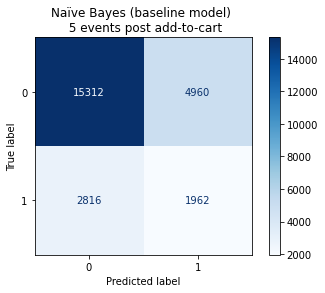

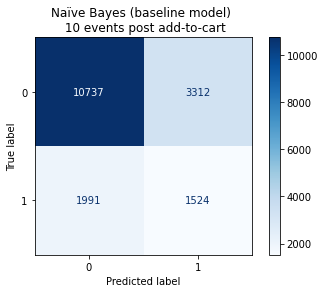

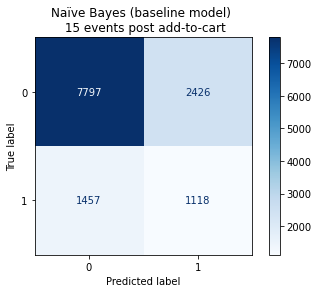

In [108]:
# Confusion matrix Naïve Bayes (baseline model) 5 events post add-to-cart
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
conv_NB5 = confusion_matrix(value_labels_5, NB_pred5)
fig_NB5 = ConfusionMatrixDisplay(conv_NB5, display_labels = ["0", "1"]) # 0 = no-purchase and 1 = purchase
fig_NB5.plot(cmap = "Blues")
plt.title("Naïve Bayes (baseline model) \n 5 events post add-to-cart")
plt.show()

# Confusion matrix Naïve Bayes (baseline model) 10 events post add-to-cart
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
conv_NB10 = confusion_matrix(value_labels_10, NB_pred10)
fig_NB10 = ConfusionMatrixDisplay(conv_NB10, display_labels = ["0", "1"]) # 0 = no-purchase and 1 = purchase
fig_NB10.plot(cmap = "Blues")
plt.title("Naïve Bayes (baseline model) \n 10 events post add-to-cart")
plt.show()

# Confusion matrix Naïve Bayes (baseline model) 15 events post add-to-cart
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
conv_NB15 = confusion_matrix(value_labels_15, NB_pred15)
fig_NB15 = ConfusionMatrixDisplay(conv_NB15, display_labels = ["0", "1"]) # 0 = no-purchase and 1 = purchase
fig_NB15.plot(cmap = "Blues")
plt.title("Naïve Bayes (baseline model) \n 15 events post add-to-cart")
plt.show()

In [109]:
# Classification report for Naïve Bayes 5 events post add-to-cart
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
class_report_NB5 = classification_report(value_labels_5, NB_pred5)

print("Classification report for Naïve Bayes (baseline) 5 events post add-to-cart \n", class_report_NB5)

# Classification report for Naïve Bayes 10 events post add-to-cart
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
class_report_NB10 = classification_report(value_labels_10, NB_pred10)

print("Classification report for Naïve Bayes (baseline) 10 events post add-to-cart \n", class_report_NB10)

# Classification report for Naïve Bayes 15 events post add-to-cart
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
class_report_NB15 = classification_report(value_labels_15, NB_pred15)

print("Classification report for Naïve Bayes (baseline) 15 events post add-to-cart \n", class_report_NB15)

Classification report for Naïve Bayes (baseline) 5 events post add-to-cart 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80     20272
           1       0.28      0.41      0.34      4778

    accuracy                           0.69     25050
   macro avg       0.56      0.58      0.57     25050
weighted avg       0.74      0.69      0.71     25050

Classification report for Naïve Bayes (baseline) 10 events post add-to-cart 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80     14049
           1       0.32      0.43      0.36      3515

    accuracy                           0.70     17564
   macro avg       0.58      0.60      0.58     17564
weighted avg       0.74      0.70      0.71     17564

Classification report for Naïve Bayes (baseline) 15 events post add-to-cart 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80     10223
    

# Error analyse Naïve Bayes classifier

To predict wether 5 post add-to-cart sessions, 10 post add-to-cart sessions, and 15 post add-to-cart sessions results in a purchase or non-purchase, a Naïve Bayes classifier with order 4, which means using a ngram of size 4 was implemented as our baseline model. The input for the baseline model were only symbolised clicks (based on 4grams).

To evaluate the classification performance of the Naïve Bayes classifier, a classification report and a confusion matrix were analyzed. In our analysis, we did not use the Accuracy metric to evaluate the models, since our dataset is inbalanced and this metric is not suitable to evaluate inbalance datasets.

The (rounded) F1-scores obtained with the Naïve Bayes (ngram = 4) model for 5 events post add-to-cart is 0.34, for 10 events post add-to-cart is 0.36, and for 15 events post add-to-cart is 0.37. The obtained F1 scores are very close to each other, however, the highest F1 score with the Naïve Bayes model was achieved with predicting 15 events post add-to-cart.

By analyzing the precision and recall scores, it was observed that the precision and recall scores for class 0 (non-purchase) are significantly higher than for class 1 (purchase). This was observed for 5 events post add-to-cart, 10 events post add-to-cart, and 15 events post add-to-cart. So, this means that the Naïve Bayes classifier predicts the non-purchase sessions better. The reason for this is that the dataset is inbalanced and contains more non-purchase sessions (class 0) than purchase sessions (class 1). Also, it was observed that there is a difference in predicting the purchase sessions (class 1): The Naïve Bayes classifier had the worst performance on predicting class 1 (purchase) based on 5 events post add-to-cart. However, as the events increases (10 and 15 events post add-to-cart) the performance of the Naïve Bayes classifier also increases for predicting class 1 (purchase). So, we can conclude that the length of the sessions is important to predict class 1 (purchase), but for class 0 (non-purchase) the lenght of the sessions does not influence the precision and recall performances, since 5, 10, and 15 event post add-to-cart have all the same precision and recall values.

# Error analyse model KNN (task 3)

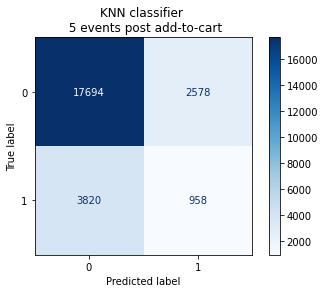

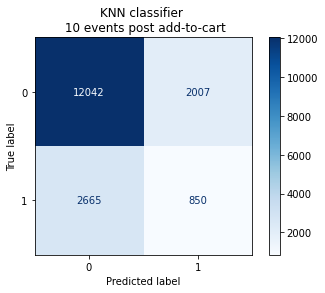

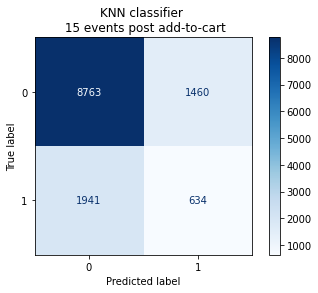

In [127]:
# Confusion matrix KNN classifier 5 events post add-to-cart
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
conv_KNN5 = confusion_matrix(value_labels_5, KNN_pred5)
fig_KNN5 = ConfusionMatrixDisplay(conv_KNN5, display_labels = ["0", "1"]) # 0 = no-purchase and 1 = purchase
fig_KNN5.plot(cmap = "Blues")
plt.title("KNN classifier \n 5 events post add-to-cart")
plt.show()

# Confusion matrix KNN classifier 10 events post add-to-cart
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
conv_KNN10 = confusion_matrix(value_labels_10, KNN_pred10)
fig_KNN10 = ConfusionMatrixDisplay(conv_KNN10, display_labels = ["0", "1"]) # 0 = no-purchase and 1 = purchase
fig_KNN10.plot(cmap = "Blues")
plt.title("KNN classifier \n 10 events post add-to-cart")
plt.show()

# Confusion matrix KNN classifier) 15 events post add-to-cart
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
conv_KNN15 = confusion_matrix(value_labels_15, KNN_pred15)
fig_KNN15 = ConfusionMatrixDisplay(conv_KNN15, display_labels = ["0", "1"]) # 0 = no-purchase and 1 = purchase
fig_KNN15.plot(cmap = "Blues")
plt.title("KNN classifier \n 15 events post add-to-cart")
plt.show()

In [128]:
# Classification report for KNN classifier 5 events post add-to-cart
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
class_report_KNN5 = classification_report(value_labels_5, KNN_pred5)

print("Classification report for KNN classifier 5 events post add-to-cart \n", class_report_KNN5)

# Classification report for KNN classifier 10 events post add-to-cart
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
class_report_KNN10 = classification_report(value_labels_10, KNN_pred10)

print("Classification report for KNN classifier 10 events post add-to-cart \n", class_report_KNN10)

# Classification report for KNN classifier 15 events post add-to-cart
# Source:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
class_report_KNN15 = classification_report(value_labels_15, KNN_pred15)

print("Classification report for KNN classifier 15 events post add-to-cart \n", class_report_KNN15)

Classification report for KNN classifier 5 events post add-to-cart 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85     20272
           1       0.27      0.20      0.23      4778

    accuracy                           0.74     25050
   macro avg       0.55      0.54      0.54     25050
weighted avg       0.72      0.74      0.73     25050

Classification report for KNN classifier 10 events post add-to-cart 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84     14049
           1       0.30      0.24      0.27      3515

    accuracy                           0.73     17564
   macro avg       0.56      0.55      0.55     17564
weighted avg       0.71      0.73      0.72     17564

Classification report for KNN classifier 15 events post add-to-cart 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84     10223
           1       0.30     

Another model that was used to predict wether there is a purchase or non-purchase based on 5, 10, 15 events post add to cart is the KNN classifierr. To evaluate the performance of the KNN classifier, we used the same evelutaion metrics that were used for the baseline model.

The (rounded) F1-scores obtained with the KNN classifier for 5 events post add-to-cart is 0.23, for 10 events post add-to-cart is 0.27, and for 15 events post add-to-cart is 0.27. The obtained F1 scores are very close to each other, but the KNN classifier predicts the 15 event post add-to-cart sessions the best (based on unrounded F1-score).

By analyzing the classification report for this classifier, we observed that the KNN classifier predicts the non-purchase sessions (class 0) better than the purchase sessions (class 1), since the precision and recall scores for non-purchase (class 0) are higher than for purchase (class 1). Also, there is a difference between predicting the 5 events post add-to-carts sessions and 10, and 15 post add-to-cart sessions. The KNN classifier performs slightly worse on predicting the 5 events post add-to-cart sessions than predicting 10 and 15 post add-to-cart sessions (for 10 and 15 clicks post add-to-cart the precision and recall socres are the same). From this, we can conclude that it is more difficult to predict 5 clicks post add-to-cart sessions than the 10 and 15 clicks post add-to-cart sessions. The performance of the KNN classifier was worser when predicting class 1 (purchase) based on shorter sessions (5 clicks post add-to-cart) than for the longer sessions (10 events post add-to-cart sessions and 15 events post add-to-cart sessions). And for class 0 (non-purchase) this was the oppisite case, the model predicted this class better based on the shortest session (5 events post add-to-cart) than predicting it based on longer sessions (10 and 15 clicks post add-to-cart).

# Comparison baseline model vs. model (task 3)

**Comparison 5 events post add-to-cart**

When comparing the performances of the Naïve Bayes classifier (baseline model) and the KNN classifier for 5 events post add-to-cart, it was observed that the Naïve Bayes classifier predicts the 5 events post add-to-cart the best, since it achieved a higher F1-score than the KNN classifier.


**Comparison 10 events post add-to-cart**


The Naïve Bayes classifier also achieved a better performance in predicting the 10 events post add-to-cart sessions compared to the KNN classifier.

**Comparison 15 events post add-to-cart**


By evaluating the performances of the Naïve Bayes classifier and the KNN classifier, it was observed that the Naïve Bayes classifier obtained the highest F1-score. So, also for predicting the 15 events post add-to-cart sessions the Naïve Bayes classifier is the best model.
>


Also, it was observed that both models predict the non-purchase sessions (class 0) better than the puchase sessions (class 1).